# Aircraft Safety Analysis

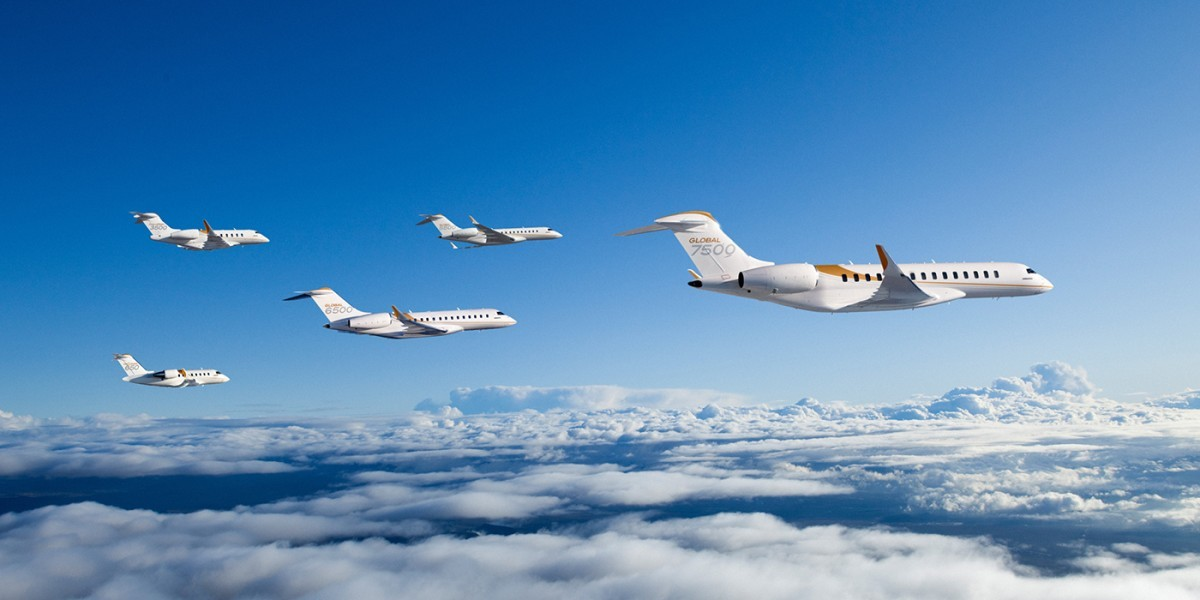

## Introduction:

Aviation safety is a crucial consideration for the industry and the public. Understanding the factors contributing to aviation accidents can lead to more effective regulations, training procedures, and safety protocols, ultimately saving lives. In this project, we delve deep into the aviation accident data to uncover patterns, trends, and potential areas of improvement. 

## Business Problem:

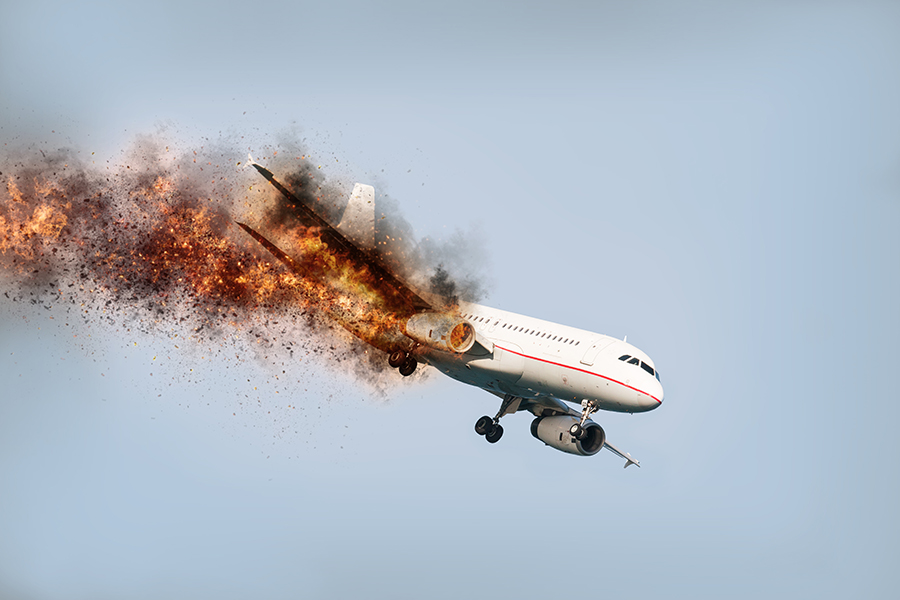

The primary goal of this analysis is to gain insights into causes and consequences of aviation accidents as our company expands into commercial and private aviation. Before we do so, it's essential to understand the risks associated with aviation so we can select the safest aircraft for our new endeavors. Specifically, I aim to answer:

1. What are the common factors that determine aircraft safety?
2. Does the type of aircraft or engine play a role in the frequency or severity of accidents?
3. Are there specific regions or countries with higher accident rates? 

To answer these questions, I'll be working with a comprehensive dataset that contains detailed information about aviation accidents including location, aircraft details, and the resulting injuries or fatalities. 

## Data:

1. `AviationData.csv`: This is our primary dataset which encompasses aviation accident data spanning from 1962 - 2023. This is provided from the National Trasportation Safety Board and encompasses various attributes related to each aviation accident such as location, injury severity, and engine type, among others.  
2. `USState_Codes.csv`: This supplementary file contains US State codes and names we will use for further analysis when categrizing by US States, facilitating a more structured and region-specific analysis. This will be particularly useful when visualizing data on a state-by-state basis or when comparing incidents accross different states. 
3. `PopData.csv`: Taken from census.gov, this dataset contains population estimates for all 50 states and U.S. territories.
4. `aircraft_data.csv`: Sourced from Kaggle, this Aircraft Pricing Dataset is an exhaustive catalogue detailing various aircraft attributes including production rates. 
5. `world_population.csv`: Another dataset sourced from Kaggle, this provides populations by country. 

## Methodology:

1. **Data Cleaning**: My intial step involves processing the data, addressing missing values, and ensuring the data is formatted correctly for our analysis. 
2. **Exploratory Data Analysis (EDA)**: Through visualizations and statistical analyses, I'll uncover the primary trends and patterns in the data.
4. **Conclusions**: Based on our analyses, I'll draw conclusions and provide recommendations for enhancing aviation safety.

## Anticipated Challenges:

Given the vast timeline of the dataset, spanning multiple decades, I anticipate encountering evolving aviation standards and practices, which could influence accident trends. Additionally, variations in data reporting standards over time might pose challenges in consistent analysis. I plan to address these challenges by segmenting our analysis into time periods or focusing on more recent data to ensure relevance to current aviation practices.

In [347]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\emmam\Documents\Flatiron\air-safety-analytics\data


In [348]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# Load 'AviationData.csv' into a DataFrame with 'latin1' encoding and without low memory constraints.
aviation_df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [349]:
state_codes = pd.read_csv('USState_Codes.csv')
state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [350]:
aviation_df.shape

(88889, 31)

### Handling Missing Values

In [351]:
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

There are numerous columns with a significant amount of missing values. Instead of treating each column individually, I've chosen to drop columns with more than 40% missing values (or less than 60% non-missing values). While I could impute these missing values, doing so for columns with such a high percentage of missing data can introduce significant bias to the dataset. 

In [352]:
aviation_df.dropna(thresh=aviation_df.shape[0]*0.6, axis=1, inplace=True)
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

I used the .dropna method to remove certain columns from aviation_df. Here's a breakdown:

- The **thresh** parameter is set to 60% of the total rows. This means we're keeping columns that have at least 60% non-missing values.
- **how='all'** ensures that we only drop columns if all their values are missing, but this is overridden by the thresh parameter.
- **axis=1** confirms we're working with columns, not rows.
- **inplace=True** modifies our original dataframe directly instead of creating a new copy.


Columns removed based on criteria set in the code:
- `Latitude`
- `Longitude`
- `Airport.Code`
- `Airport.Name`
- `Aircraft.Category`
- `FAR.Description`
- `Schedule`
- `Air.carrier`

In [353]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Now that those columns are out of the way, I'll address the missing values in our dataset through imputation. From this point, I will examine columns on a case-by-case basis. Next, I'll examine the `Broad.phase.of.flight` column to determine the most suitable approach for filling in the gaps.

In [354]:
aviation_df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

By examining the unique values in the `Broad.phase.of.flight` column, I observe that there's an 'Unknown' category, which is an apt substitute for missing or 'NaN' entries. Given this, I'll proceed to replace all 'NaN' values with 'Unknown' then plot the results to get a better idea of the data:

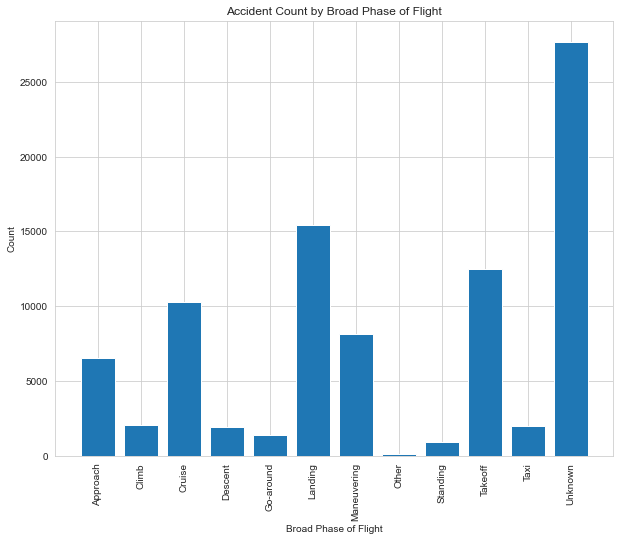

In [355]:
aviation_df['Broad.phase.of.flight'] = aviation_df['Broad.phase.of.flight'].fillna('Unknown')

temp = aviation_df.groupby('Broad.phase.of.flight').count()
plt.figure(figsize=(10, 8))
plt.bar(x=temp.index, height=temp['Event.Id'])
plt.title('Accident Count by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

Next, I will move on to `Aircraft.damage`. First, we want to know all the ways they classify aircraft damage. Then I can infer which value is suitable for imputation.

In [356]:
aviation_df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

By examining the distribution of values in the `Aircraft.damage` column, I notice two categories that could potentially replace missing data: 'Minor' and 'Unknown'. The 'Unknown' category doesn't add much informative value. A plausible approach might be to fill 'NaN' values with 'Minor'. The rationale here is that had there been 'Substantial' or 'Destroyed' damage to the aircraft, it would likely have been documented. While this isn't a flawless strategy, it does offer a more informed estimate than simply labeling as 'Unknown'. Since I'm imputing all 'NaN' values as 'Minor', it's logical to also convert the 'Unknown' values to 'Minor'. This approach not only maintains consistency but also provides more informative data, as 'Unknown' doesn't offer much insight.

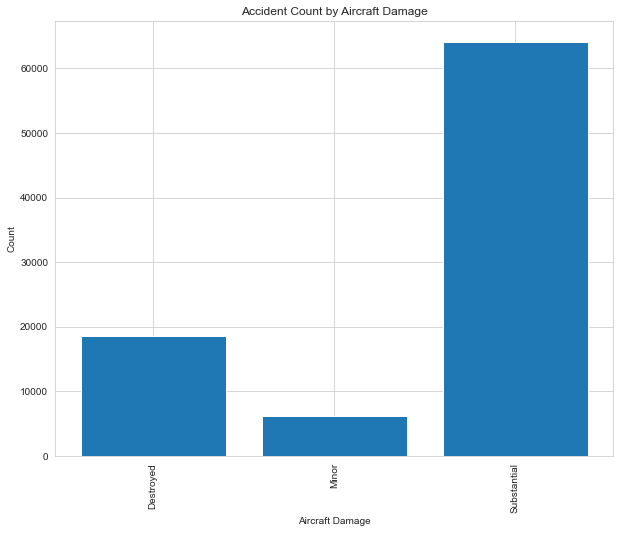

In [357]:
aviation_df['Aircraft.damage'] = aviation_df['Aircraft.damage'].fillna('Minor')
aviation_df['Aircraft.damage'] = aviation_df['Aircraft.damage'].replace('Unknown', 'Minor')

temp = aviation_df.groupby('Aircraft.damage').count()
plt.figure(figsize=(10, 8))
plt.bar(x=temp.index, height=temp['Event.Id'])
plt.title('Accident Count by Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

In [358]:
aviation_df['Report.Status'].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

Upon examining the unique values in the `Report.Status` column, it's evident that some entries are lengthy narratives, making them unsuitable for concise analysis or visualization. Such detailed descriptions aren't ideal for aggregate analysis. While values like 'Probable Cause', 'Factual', and 'Foreign' seem relevant, the longer descriptive sentences can be considered as 'noise' in our dataset. As a first step towards cleaning this column, I consider filtering out entries containing the term 'Pilot', as these seem to be more descriptive in nature.

In [359]:
# Update the 'Report.Status' column in the 'aviation_df' DataFrame.
# For each entry in the 'Report.Status' column, check if the string 'pilot' is present.
# If 'pilot' is found, replace the entry with the string 'Pilot'. Otherwise, keep the original entry. 
aviation_df['Report.Status'] = ['Pilot' if 'pilot' in str(x) else x for x in aviation_df['Report.Status']]

In [360]:
aviation_df.groupby('Report.Status').count()['Event.Id'].sort_values(ascending=False)

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                  61754
Pilot                                                                                                                                                                                                                                                                                                           13420
Foreign                                                                                                                                                                                                                                                                                                          1999
<br /><br />                                            

Further inspection of the `Report.Status` column shows me clearly that the initial data cleaning didn't address all the issues. With over 4,600 unique entries, many of which are lengthy narratives, the column remains cluttered. Given that this column isn't critical for our core analysis, it's more efficient to drop it entirely rather than investing more time in trying to refine its values.

In [361]:
aviation_df.drop('Report.Status', axis=1, inplace=True)
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage               0
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight         0
Publication.Date          13771
dtype: int64

In [362]:
aviation_df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

`Purpose.of.flight` columns holds potential significant for our analysis, so I want to treat this column gingerly. An initial review of its unique values suggests that 'Unknown' is an appropriate replacement for missing values. Additionally, for consistency and better categorization, I'll make the following adjustments:

- 'Air Race/Show' can be converted 'Air Race Show'
- 'Public Aircraft - Federal', 'Public Aircraft - Local', and 'Public Aircraft - State' can be converted to 'Public - Govt.'
- 'Other Work Use' and 'Executive/Corporate' can be converted to 'Business'
- 'PUBS' and 'PUBL' are both abbreviations for 'Public'
- 'Public Aircraft' can be converted to 'Public'

I'll implement these changes by using pandas .replace() method.

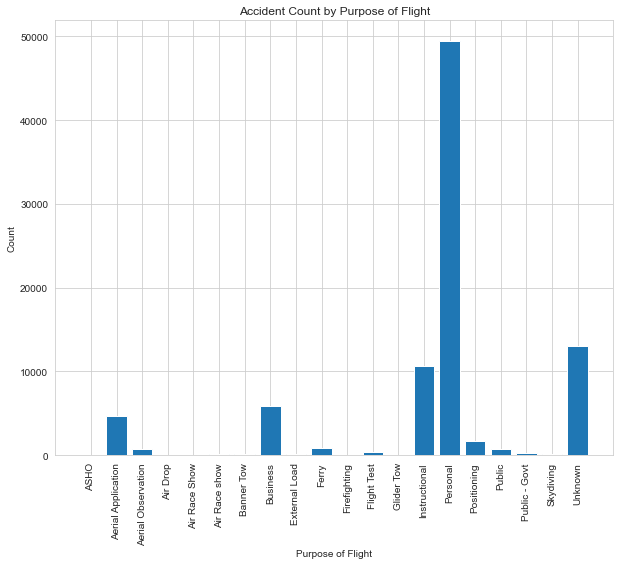

In [363]:
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Air Race/show', 'Air Race Show')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Public Aircraft - Federal', 'Public - Govt')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Public Aircraft - State', 'Public - Govt')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Public Aircraft - Local', 'Public - Govt')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Other Work Use', 'Business')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Executive/corporate', 'Business')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('PUBL', 'Public')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('PUBS', 'Public')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].replace('Public Aircraft', 'Public')

aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].fillna('Unknown')

temp = aviation_df.groupby('Purpose.of.flight').count()
plt.figure(figsize=(10, 8))
plt.bar(x=temp.index, height=temp['Event.Id'])
plt.title('Accident Count by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

In [364]:
aviation_df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

The given unique values primarily represent the severity and impact of incidents or accidents. The majority of the entries detail fatal incidents, indicated by the prefix 'Fatal', followed by a number in parentheses. This number seems to denote the count of fatalities in that specific incident. For example, 'Fatal(2)' likely means there were 2 fatalities in that incident.

There are also entries like 'Non-Fatal', 'Incident', 'Minor', and 'Serious', which provide additional context on the severity of the incident without specifying a fatality count. 'Unavailable' suggests that the data for some incidents was not available or not recorded. There's also an entry 'Fatal' without any specific count.

Lastly, the presence of a 'nan' value indicates that there are some missing values in this column.

This column provides insight into the severity of each incident which may be vital for safety analyses and preventive measures. However, more investigation of this column is necessary.

In [365]:
fatal_injuries = aviation_df[aviation_df['Injury.Severity'].str.contains('Fatal\(\d+\)', na=False)]

fatal_injuries

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63902,20080117X00071,Accident,LAX08WA045,2007-12-29,"WESTGATE BRIDGE, AUSTRALIA",Australia,Fatal(1),Substantial,NaN,Robinson,...,NaN,NaN,Instructional,1.0,1.0,NaN,NaN,VMC,Unknown,17-01-2008
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,Fatal(2),Destroyed,N136DG,Althouse,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,03-12-2008
63907,20071231X02014,Accident,DFW08FA053,2007-12-29,"Venice, LA",United States,Fatal(1),Destroyed,N211EL,Bell,...,1.0,Turbo Shaft,Unknown,1.0,1.0,2.0,NaN,IMC,Approach,15-07-2009
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,Fatal(3),Substantial,N109AE,Bell,...,1.0,Turbo Shaft,Business,3.0,0.0,0.0,0.0,VMC,Maneuvering,15-01-2009


From a quick glance at the unique values in the dataset, it's evident that the number in the parentheses corresponds to the number in `Total.Fatal.Injuries`, making `Injury Severity` redundant. 

In [366]:
aviation_df.drop('Injury.Severity', axis=1, inplace=True)

In [367]:
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Aircraft.damage               0
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight             0
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight         0
Publication.Date          13771
dtype: int64

Given the minimal missing values in the `Location` column relative to our dataset's size, I'll drop rows lacking this information. I'll impliment the same strategy for `Make`, `Model`, and `Amateur.Built` as they're 'NaN' values are similarly small. 

In [368]:
aviation_df.dropna(subset=['Location'], inplace=True)
aviation_df.dropna(subset=['Make'], inplace=True)
aviation_df.dropna(subset=['Model'], inplace=True)
#aviation_df.dropna(subset=['Amateur.Built'], inplace=True)

Next, we'll address our other Injuries columns:

- `Total.Fatal.Injuries`
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`

Our first step is to examine the most commonly occuring value:

In [369]:
aviation_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].mode()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,0.0,0.0,0.0,0.0


The mode for each of the injury-related columns — `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured` — is 0.0. This indicates that the most common occurrence for each type of injury is zero. In other words, the majority of incidents in the dataset did not result in any fatalities, serious injuries, or minor injuries.

Given this, it's fair to proceed with 0 imputation for 'NaN' values which we'll do with a `for` loop: 

In [370]:
columns_to_impute = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# For each column in the list 'columns_to_impute' replace missing values with 0
for col in columns_to_impute:
    aviation_df[col].fillna(0, inplace=True)

In [371]:
# Count the occurrences of each unique value in the 'Country' column of the aviation_df DataFrame.
# This will give us a series where the index is the country name and the value is the count of occurrences.
aviation_df['Country'].value_counts()

# From the aviation_df DataFrame, select rows where the 'Country' field is missing (null).
# Then, from those selected rows, extract the 'Location' column.
# This gives us a Series of locations that have a missing country.
missing_country_locations = aviation_df[aviation_df['Country'].isnull()]['Location']

missing_country_locations.unique()

array(['SAINT CROIX', 'HUMA CAO', 'MUSTANG BLK A11', 'MOCA',
       'WEST DELTA 105D', 'WEST CAMERON #4', 'CHARLOTTE AMALI',
       'NEAR ST. CROIX', 'BUCCANEER OIL F', 'NEAR RAMEY', 'CULEBRA',
       'GRAND ISLE B43Q', 'PATILLAS', 'E. CAMERON', 'SHIPSHOAL 295',
       'LAJAS', 'CABO ROJO', 'EUGENE ISL.BLK', 'VIEQUES', 'EUGENE ISLAND',
       'GRAND ISLE BLK', 'ST. THOMAS', 'MANATI', 'DORADO', 'QUEBRADILLAS',
       'GREEN CANYON172', 'STAKE ISLAND', 'CULEBRA ISLAND',
       'VERMILLION 255B', 'GUAYAMA', 'W CAMRN BLK 624', 'W CAMERON 540',
       'SOUTH PELTO', 'LOIZA', 'E BRAKE BLK 397', 'ST. CROIX',
       'OCEAN CAY', 'PONCE', 'SHIP SHOAL 241', 'WEST DELTA 105',
       'ST.THOMAS', 'E CAMERON BLK 2', 'SHIP SHOAL BLK', 'SOUTH MARSH',
       'NORTH PADRE 967', 'EAST CAMERON', 'GRAND ISLE BL73',
       'LAS PIEDRAS', 'SANTO DOMINGO', 'VEGA BAJA', 'ISLA VERDE',
       'GRAND ISLE', 'MUSTANG ISLAND', 'ISABELA', 'NARANJITO',
       'MATAGORDA 665', 'NO.ATLANTIC OC', 'PONCH', 'MAYAGUEZ',
 

In [372]:
# Setting the 'Country' column to "Int'l Waters" for rows where the 'Location' is "int'l waters"
aviation_df.loc[aviation_df['Location'] == "int'l waters", "Country"] = "Int'l Waters"

aviation_df['Location'].unique()

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '], dtype=object)

In [373]:
# Standardize formatting for 'Location' column to uppercase
aviation_df['Location'] = aviation_df['Location'].str.upper()
aviation_df['Location'].unique()

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'SALTVILLE, VA', ...,
       'SAN MANUAL, AZ', 'AUBURN HILLS, MI', 'BRASNORTE, '], dtype=object)

In [374]:
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     223
Aircraft.damage               0
Registration.Number        1253
Make                          0
Model                         0
Amateur.Built                95
Number.of.Engines          5994
Engine.Type                7000
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4434
Broad.phase.of.flight         0
Publication.Date          13753
dtype: int64

In [375]:
aviation_df.dropna(subset=['Country'], inplace=True)

In [376]:
aviation_df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [377]:
# Standardizing 'Unkown' and 'None' values
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].replace('UNK', 'Unknown')
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].replace('NONE', 'None')

aviation_df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR'], dtype=object)

In [378]:
aviation_df['Engine.Type'].isna().sum()

6995

For the `Engine.Type` column, our imputation strategy needs to be more nuanced and data-driven. Given the diverse range of aircraft makes and models, it's not appropriate to apply a generic fill for missing engine types. Instead, I leverage the data itself to inform our imputation.

The steps are as follows:

1. **Grouping by Aircraft Make and Model**:
My dataset contains various makes and models of aircraft, and each of these combinations might have a specific engine type that's most commonly associated with it. So, the first step is to group the data by the Make_Model column. This allows me to examine each unique make and model individually.


2. **Calculating the Mode of Engine.Type for Each Group**:
Within each group (each unique Make_Model), I calculate the mode of the `Engine.Type` column. The mode represents the most frequently occurring engine type for that specific make and model.


3. **Handling Ambiguities**:
It's possible that, for some aircraft models, there isn't a clear most frequent engine type. In such cases, where the mode might be empty, I return a np.nan to signify that there's no clear common engine type.


4. **Mapping Make and Model to Engine Type**:
The output from the above steps is a Series that pairs each `Make_Model` with its most common `Engine.Type`. To make this output more usable for imputation, I convert it into a dictionary using the .to_dict() method. This dictionary, named engine_mapping, effectively becomes our reference for filling missing engine types.

In essence, this approach ensures that my imputation for `Engine.Type` is grounded in the data itself. Instead of making broad assumptions, I'm using the relationships inherent in the dataset to guide our imputation. 

Before we start grouping, however, I will create a separate column that consolidates Make and Model details to ensure my imputation is accurate. 

In [379]:
# Create new 'Make_Model' column, concatenating each Make + Model pair with a space in-between
aviation_df['Make_Model'] = aviation_df['Make'] + ' ' + aviation_df['Model']

# Create a mapping of the most common 'Engine Type' for each 'Make_Model' in the 'aviation_df' DataFrame.
# The 'groupby' method is used to group the data by 'Make_Model'.
# Within each group, apply a lambda function to determine the mode of 'Engine Type' which represents the most frequently 
# occurring value.
# The 'if not x.mode().empty' condition checks if the mode result is not empty (there is at least one occurrence of the value).
# If the mode is not empty, the first mode value ([0]) is taken as the representative engine type for the make and model.
# If the mode is empty (no engine type data is available for the make and model), a NaN value is assigned indicating missing data.
# The 'to_dict()' method converts the resulting series into a dictionary where the keys are the 'Make_Model' and the values are 
# the corresponding most common 'Engine Type'.
engine_mapping = aviation_df.groupby('Make_Model')['Engine.Type'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

# For rows with missing 'Engine.Type' values, fill them based on the most common engine type for that aircraft 'Make_Model'
aviation_df['Engine.Type'] = aviation_df.apply(
    lambda row: engine_mapping[row['Make_Model']] if pd.isna(row['Engine.Type']) else row['Engine.Type'], 
    axis=1
)

aviation_df['Engine.Type'].isna().sum() 

2093

In [380]:
# Creating a new dataframe to analyse results of 'Unknown' engine types
unknown_engine = aviation_df[aviation_df['Engine.Type'].isin(['Unknown'])]
unknown_engine[['Make_Model', 'Engine.Type']].head()

,Make_Model,Engine.Type
62,Schleicher ASW 20,Unknown
247,Raven S-55A,Unknown
353,Balloon Works FIREFLY,Unknown
433,Barnes FIREFLY-7,Unknown
436,Barnes BALLOON AX7,Unknown


The `Make_Model` and `Engine.Type` columns provide crucial information about the type of aircraft and its engine, respectively. Accurate and complete information in these columns is essential for any analysis that relates aircraft characteristics to safety metrics.

**Schleicher ASW 20**: This model is a glider. Gliders, by definition, do not have engines. Thus, while the "Unknown" label for its Engine.Type might technically be correct (since it doesn't have an engine), it can be misleading in the context of the dataset. It would be more accurate to label it as "None" or exclude it to avoid misinterpretations.

**Balloons (Raven S-55A, Balloon Works FIREFLY, Barnes FIREFLY-7, Barnes BALLOON AX7)**: Hot air balloons operate quite differently than conventional aircraft as they don't have engines in the traditional sense. Labeling their `Engine.Type` as "Unknown" can again be misleading. It might be more appropriate to label them as "Burner" or something similar, but such granularity is not needed for this analysis.

By excluding these entries, I ensure that the dataset remains consistent and reduces the potential for misinterpretation during analysis.

In [381]:
aviation_df = aviation_df[aviation_df['Engine.Type'] != 'Unknown']

Even after eliminating the 'Unknown' entries for 'Engine.Type', we still have to deal with NaN values. Given that 'Unknown' has already been used as a placeholder, I'll continue with this approach and fill in the NaNs with 'Unknown' to maintain consistency.

In [382]:
nan_engine = aviation_df[aviation_df['Engine.Type'].isin([np.nan])]
nan_engine

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Registration.Number,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Publication.Date,Make_Model
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"NEW DELHI, INDIA",India,Minor,NaN,Tupolev,TU-154,...,NaN,Unknown,349.0,0.0,0.0,0.0,NaN,Unknown,24-01-2002,Tupolev TU-154
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"NEW DELHI, INDIA",India,Minor,NaN,Boeing,747-168,...,NaN,Unknown,349.0,0.0,0.0,0.0,NaN,Unknown,24-01-2002,Boeing 747-168
40977,20010711X01370,Incident,DCA97WA013,1996-12-05,"HONG KONG, UNITED KINGDOM",United Kingdom,Minor,NaN,Boeing,747-236F,...,NaN,Unknown,0.0,0.0,0.0,3.0,NaN,Unknown,12-07-2001,Boeing 747-236F
41209,20010711X01372,Accident,DCA97WA023,1997-02-01,"FORT DU FRANCE, WEST INDIES",West Indies,Minor,NaN,Boeing,DC-10-30,...,NaN,Unknown,0.0,1.0,15.0,3.0,NaN,Unknown,12-07-2001,Boeing DC-10-30
41339,20010711X01374,Accident,DCA97WA033,1997-03-07,"MEDELLIN, CENTRAL AFRICAN REPUBLIC",Central African Republic,Minor,NaN,Cessna,Citation 500,...,NaN,Unknown,0.0,0.0,0.0,0.0,NaN,Unknown,12-07-2001,Cessna Citation 500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88858,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",United States,Substantial,N160PT,PIPER,PA-44,...,NaN,Personal,0.0,1.0,0.0,0.0,VMC,Unknown,15-12-2022,PIPER PA-44
88867,20221213106456,Accident,WPR23LA066,2022-12-12,"REDDING, CA",United States,Substantial,N415RX,AIRBUS HELICOPTERS,EC 130 T2,...,NaN,Business,0.0,1.0,0.0,0.0,NaN,Unknown,27-12-2022,AIRBUS HELICOPTERS EC 130 T2
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"WICHITA, KS",United States,Substantial,N398KL,SWEARINGEN,SA226TC,...,NaN,Unknown,0.0,0.0,0.0,1.0,NaN,Unknown,19-12-2022,SWEARINGEN SA226TC
88878,20221227106496,Accident,WPR23LA074,2022-12-17,"COTTONWOOD, CA",United States,Minor,N9YA,ROYSE RALPH L,GLASAIR,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,Unknown,27-12-2022,ROYSE RALPH L GLASAIR


In [383]:
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].fillna('Unknown')
aviation_df['Engine.Type'].value_counts()

Reciprocating      72128
Turbo Shaft         3926
Turbo Prop          3726
Turbo Fan           3671
Unknown             2093
Turbo Jet            729
None                  30
Geared Turbofan       15
Electric              11
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

`Number.of.Engines` is another column that is likely to contain important data for our analysis so I'll employ the same impuation strategy implemented for `Engine.Type`. 

In [384]:
num_engines_mapping = aviation_df.groupby('Make_Model')['Number.of.Engines'].apply(lambda x: x.mode()[0] if not x.mode()
                                                                                   .empty else np.nan).to_dict()

# For rows with missing 'Engine.Type' values, fill them based on the most common engine type for that aircraft 'Make_Model'
aviation_df['Number.of.Engines'] = aviation_df.apply(
    lambda row: num_engines_mapping[row['Make_Model']] if pd.isna(row['Number.of.Engines']) else row['Number.of.Engines'], 
    axis=1
)

aviation_df['Number.of.Engines'].isna().sum()

1213

In [385]:
aviation_df.dropna(subset=['Number.of.Engines'], inplace=True)

aviation_df['Number.of.Engines'].isna().sum()

0

In [386]:
# Checking value counts to inform imputation strategy
aviation_df['Weather.Condition'].value_counts()

VMC    74721
IMC     5834
UNK      587
Unk      240
Name: Weather.Condition, dtype: int64

In [387]:
# Standardize formatting for 'Unknown' weather conditions
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].replace('Unk', 'UNK')
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].fillna('UNK')
aviation_df['Weather.Condition'].value_counts()

VMC    74721
IMC     5834
UNK     4564
Name: Weather.Condition, dtype: int64

In [388]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Publication.Date', 'Make_Model'],
      dtype='object')

In [389]:
aviation_df['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

Upon reviewing the columns, it becomes evident that the dataset includes some extraneous details. Notably:

1. `Investigation.Type`: This columnn clarifies whether the crash resulted in bodily harm ('accident') or not ('incident'). Considering we have our injuries columns containing more detailed information, this column is redundant. 

2. `Accident.Number`, `Registration.Number`: These columns are irrelevant to our analysis. 

3. `Publication.Date`: We already have a complete `Event.Date` column which provides a timestamp for each accident/incident, rendering `Publication.Date` irrelevant to our examination. 

In [390]:
aviation_df.drop('Investigation.Type', axis=1, inplace=True)
aviation_df.drop('Accident.Number', axis=1, inplace=True)
aviation_df.drop('Registration.Number', axis=1, inplace=True)
aviation_df.drop('Publication.Date', axis=1, inplace=True)
aviation_df.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Aircraft.damage',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Make_Model'],
      dtype='object')

In [391]:
amateur_built = aviation_df[aviation_df['Amateur.Built'] == 'Yes']
amateur_built.head(50)

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model
45,20020917X02423,1982-01-06,"ROLLA, MO",United States,Substantial,Cessna,340,Yes,2.0,Reciprocating,Business,0.0,0.0,0.0,3.0,VMC,Approach,Cessna 340
73,20020917X02289,1982-01-10,"UPLAND, CA",United States,Substantial,Quickie,1,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Takeoff,Quickie 1
99,20020917X02306,1982-01-17,"MOJAVE, CA",United States,Destroyed,Bede Aircraft,BD-5B,Yes,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Maneuvering,Bede Aircraft BD-5B
124,20020917X02296,1982-01-19,"KINGMAN, AZ",United States,Substantial,Beachner,QUICK SILVER,Yes,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,Climb,Beachner QUICK SILVER
143,20020917X01762,1982-01-21,"NEW ALBANY, MS",United States,Destroyed,Grumman,AA-1,Yes,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Grumman AA-1
146,20020917X01782,1982-01-21,"SHELL LAKE, WI",United States,Substantial,Mooney,M-20,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Takeoff,Mooney M-20
148,20020917X02307,1982-01-22,"LANCASTER, CA",United States,Destroyed,Sons Mustang,II,Yes,1.0,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,Unknown,Sons Mustang II
178,20020917X02261,1982-01-27,"LAGUNITAS, CA",United States,Destroyed,Bell,UH1B,Yes,1.0,Turbo Shaft,Unknown,1.0,0.0,0.0,0.0,VMC,Maneuvering,Bell UH1B
187,20020917X02165,1982-01-28,"FOWLER, CA",United States,Substantial,Mooney,M20C,Yes,1.0,Reciprocating,Business,0.0,0.0,0.0,1.0,VMC,Landing,Mooney M20C
227,20020917X01963,1982-02-02,"WEST JORDAN, UT",United States,Substantial,Smith Miniplane,BK-1,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Smith Miniplane BK-1


For the purpose of this analysis, I will exclude amateur-built aircraft from the dataset. Since our focus is on identifying the safest aircraft for commercial and private use, amateur-built models fall outside the scope of our investigation.

In [392]:
aviation_df = aviation_df[aviation_df['Amateur.Built'] != 'Yes']
amateur_built = aviation_df[aviation_df['Amateur.Built'] == 'Yes']
amateur_built.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model


In [393]:
aviation_df.drop('Amateur.Built', axis=1, inplace=True)

Now that I've taken care of null values and cleaned up our columns, we'll move on to checking for duplicates and formatting values. 

In [394]:
duplicates = aviation_df[aviation_df.duplicated(['Event.Id'])]
duplicates

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model
118,20020917X01908,1982-01-19,"ROCKPORT, TX",United States,Destroyed,Swearingen,SA226-T(B),2.0,Turbo Prop,Business,3.0,0.0,0.0,0.0,IMC,Approach,Swearingen SA226-T(B)
159,20020917X02400,1982-01-23,"NEWPORT RICHEY, FL",United States,Substantial,Piper,PA-34-200T,2.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Approach,Piper PA-34-200T
160,20020917X02259,1982-01-23,"VICTORVILLE, CA",United States,Substantial,Piper,PA-28-235,1.0,Reciprocating,Personal,2.0,0.0,4.0,0.0,VMC,Cruise,Piper PA-28-235
245,20020917X02585,1982-02-06,"MEDFORD, OR",United States,Substantial,Taylorcraft,BC12-D,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Taxi,Taylorcraft BC12-D
248,20020917X02173,1982-02-06,"SAN JOSE, CA",United States,Substantial,Cessna,180,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Taxi,Cessna 180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88593,20220929106019,2022-09-28,"LONDON,",Great Britain,Minor,BOEING,757,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,2.0,UNK,Unknown,BOEING 757
88777,20221112106276,2022-11-12,"DALLAS, TX",United States,Destroyed,BOEING,B17,4.0,Unknown,ASHO,6.0,0.0,0.0,0.0,VMC,Unknown,BOEING B17
88796,20221121106336,2022-11-18,"LAS VEGAS, NV",United States,Substantial,CESSNA,172M,1.0,Reciprocating,Instructional,0.0,0.0,0.0,3.0,VMC,Unknown,CESSNA 172M
88798,20221122106340,2022-11-18,"MARRAKECH,",Morocco,Minor,CESSNA,525,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,CESSNA 525


In [395]:
# Dropping duplicates matching on 'Event.Id'
aviation_df.drop_duplicates(subset='Event.Id', keep='first', inplace=True)
# Re-run same code as above to check for duplicates
duplicates = aviation_df[aviation_df.duplicated(['Event.Id'])]
duplicates

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model


To maintain data integrity, I still need to verify that the formatting accross all columns is accurate according to my needs. Given that this data was collected over a span of 61 years, there's likely inconsistencies in how data was recorded. Country names have also changed over time so we will need to standardize these to eliminate redundancy. 

In [396]:
aviation_df['Country'].unique()

array(['United States', 'GULF OF MEXICO', 'Puerto Rico', 'ATLANTIC OCEAN',
       'HIGH ISLAND', 'Bahamas', 'MISSING', 'Angola',
       'Korea, Republic Of', 'American Samoa', 'PACIFIC OCEAN', 'Canada',
       'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles', 'Iceland',
       'Guam', 'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'El Salvador', 'Guyana', 'Costa Rica', 'United Kingdom',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Suriname', 'Honduras', 'Guatemala',
       'Belize', 'Papua New Guinea', 'Dominican Republic',
       'British Virgin Islands', 'Panama', 'Senegal', 'BLOCK 651A',
       'France', 'Mauritius', 'Aruba', 'Saudi Arabia', 'Cuba',
       'French Guiana', 'Germany', 'Congo', 'Jamaica',
       'Federated States Of Micronesia', 'Nicaragua', 'Haiti',
       'Marshall Islands', 'Ecuador', 'Poland', 'Colombia',
       'Trinidad And Tob

Upon examining the "Countries" column, it's evident that there are inconsistencies in formatting and naming conventions. To enhance the dataset's clarity and reduce redundancy, I'll standardize the names to maintain a consistent format. To start, I'll convert country names to their official designations. Then, I will standardize formatting by converting the names to title case for readability and clarity. 

In [397]:
aviation_df['Country'].replace(['Great Britain', 'Scotland'], 'United Kingdom', inplace=True)
aviation_df['Country'].replace(['GULF OF MEXICO', 'ATLANTIC OCEAN', 'PACIFIC OCEAN', 'Pacific Ocean', "Int'l Waters"], 
                               'International Waters', inplace=True)
aviation_df['Country'].replace('Puerto Rico', 'United States', inplace=True)
aviation_df['Country'].replace('Korea, Replublic Of', 'South Korea', inplace=True)
aviation_df['Country'].unique()

array(['United States', 'International Waters', 'HIGH ISLAND', 'Bahamas',
       'MISSING', 'Angola', 'Korea, Republic Of', 'American Samoa',
       'Canada', 'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles',
       'Iceland', 'Guam', 'Australia', 'CARIBBEAN SEA', 'West Indies',
       'Japan', 'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'El Salvador', 'Guyana', 'Costa Rica', 'United Kingdom',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Suriname', 'Honduras', 'Guatemala',
       'Belize', 'Papua New Guinea', 'Dominican Republic',
       'British Virgin Islands', 'Panama', 'Senegal', 'BLOCK 651A',
       'France', 'Mauritius', 'Aruba', 'Saudi Arabia', 'Cuba',
       'French Guiana', 'Germany', 'Congo', 'Jamaica',
       'Federated States Of Micronesia', 'Nicaragua', 'Haiti',
       'Marshall Islands', 'Ecuador', 'Poland', 'Colombia',
       'Trinidad And Tobago', 'Austria', 'Netherlands', 'Solomon Islands',


In [398]:
# Filtering dataset to rows where 'Country' is 'MISSING'
missing_country = aviation_df[aviation_df['Country'] == 'MISSING'].head()
missing_country.head(50)

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model
2912,20020917X04922,1982-09-28,MISSING ACFT,MISSING,Substantial,Beech,H35,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Unknown,Beech H35
3094,20020917X04906,1982-10-20,MISSING ACFT,MISSING,Destroyed,Piper,PA-31,2.0,Reciprocating,Unknown,8.0,0.0,0.0,0.0,UNK,Unknown,Piper PA-31
9646,20001214X41097,1984-09-02,MISSING ACFT,MISSING,Destroyed,Cessna,152,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Unknown,Cessna 152
11599,20001214X36536,1985-05-08,MISSING ACFT,MISSING,Destroyed,Cessna,210K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,UNK,Unknown,Cessna 210K
13017,20001214X37800,1985-09-17,MISSING,MISSING,Destroyed,Swearingen,SA-226T,2.0,Turbo Prop,Business,1.0,0.0,0.0,0.0,VMC,Unknown,Swearingen SA-226T


In [399]:
unknown_country = aviation_df[aviation_df['Country'] == 'Unknown'].head()
unknown_country.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model
63009,20081219X65340,2007-07-23,"INDIAN OCEAN, UNKNOWN",Unknown,Minor,Airbus,A330,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,Airbus A330
73390,20130514X13118,2013-04-07,"UNKOWN, UNKOWN",Unknown,Destroyed,BEECH,1900,2.0,Turbo Prop,Positioning,1.0,0.0,0.0,0.0,UNK,Unknown,BEECH 1900


Considering the minimal information presented from the five aircraft labeled as 'Missing' in our dataset - as well as the 2 labeled as 'Unknown', I will proceed to remove these anomalies from our analysis.

In [400]:
aviation_df = aviation_df[aviation_df['Country'] != 'MISSING']
aviation_df = aviation_df[aviation_df['Country'] != 'Unknown']

In [401]:
aviation_df['Country'] = aviation_df['Country'].str.title()
aviation_df['Country'].unique()

array(['United States', 'International Waters', 'High Island', 'Bahamas',
       'Angola', 'Korea, Republic Of', 'American Samoa', 'Canada',
       'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles', 'Iceland',
       'Guam', 'Australia', 'Caribbean Sea', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'El Salvador', 'Guyana', 'Costa Rica', 'United Kingdom',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Suriname', 'Honduras', 'Guatemala',
       'Belize', 'Papua New Guinea', 'Dominican Republic',
       'British Virgin Islands', 'Panama', 'Senegal', 'Block 651A',
       'France', 'Mauritius', 'Aruba', 'Saudi Arabia', 'Cuba',
       'French Guiana', 'Germany', 'Congo', 'Jamaica',
       'Federated States Of Micronesia', 'Nicaragua', 'Haiti',
       'Marshall Islands', 'Ecuador', 'Poland', 'Colombia',
       'Trinidad And Tobago', 'Austria', 'Netherlands', 'Solomon Islands',
       'Per

In [402]:
aviation_df['Event.Date'].dtypes

dtype('O')

In [403]:
# Converting 'Event.Date' to datetime format for future plotting
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'])
aviation_df.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Aircraft.damage',
       'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Make_Model'],
      dtype='object')

Now that the dataset has been cleaned, I'm ready to merge this with out state_codes dataframe to pull in the state names for each location, based off of the state abbreviation in our `Location` column. 

In [404]:
state_codes.columns

Index(['US_State', 'Abbreviation'], dtype='object')

In [405]:
state_codes.head(100)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


To merge the aviation_df dataset with state code information, I'll first need to isolate the state abbreviations from the Location column. These abbreviations are essential for merging with a secondary dataset containing state codes, which will be beneficial for future data analysis and visualization tasks.

Here's the step-by-step breakdown of the process:

**Extracting State Abbreviations**:
I begin by creating a new column named `State.Abbreviation`. To populate this column, I'll process the Location column, which contains strings structured as "City, State Abbreviation". By splitting these strings at the comma (,), I can separate the city and state abbreviation. I take the last element from this split, which we expect to be the state abbreviation, and trim any extra whitespace for uniformity.

**Mapping Abbreviations**:
Recognizing that not all entries in the `Location` column will perfectly adhere to the "City, State Abbreviation" format, I prepare two dictionaries:

**correct_abbreviations**: This serves as a reference for converting recognized abbreviations like 'PR' for Puerto Rico and 'GU' for Guam into their full state/territory names.
non_standard_mapping: This addresses any anomalies or non-standard entries such as 'SAN JUAN' or broader regions like 'GULF OF MEXICO', assigning them to appropriate categories or labels such as 'International Waters'.

**Cleaning Function**:
With the dictionaries in place, I define a function clean_state_abbreviation that applies our mapping logic to each abbreviation. The function checks against both dictionaries and also validates whether an abbreviation is two letters long and alphabetical, a format that we assume to be correct for U.S. states. If an entry does not fit any criteria, it is labeled 'Unknown', which allows me to maintain data integrity by clearly marking unidentifiable or missing data.

**Applying the Cleaning Logic**:
I use the clean_state_abbreviation function to iterate over the `State.Abbreviation` column, ensuring each entry is either corrected, mapped to a known label, or marked as 'Unknown'.

**Merging State Codes**:
Finally, with a cleaned `State.Abbreviation` column, I'm positioned to merge our aviation_df with the state_codes dataset. This dataset presumably contains mappings of state abbreviations to full state names and potentially other relevant information. I perform a left join on the State.Abbreviation column, aligning the dataframes based on these abbreviations. Post-merge, I drop the redundant abbreviation column from state_codes to avoid duplicating data.

By following this methodical approach, I prepare aviation_df for more in-depth analysis and visualization, where understanding the geographical context will be valuable. I also set a precedent for data cleanliness and reliability, which are foundational for robust data-driven insights.

In [406]:
# Creating a new column for State Abbreviation and extracting data from dataframe
aviation_df['State.Abbreviation'] = aviation_df['Location'].str.split(',').str[-1].str.strip()

# A dictionary for correct state abbreviations.
correct_abbreviations = {
    'PR': 'Puerto Rico',
    'GU': 'Guam',
}

# A mapping for non-standard or incorrect abbreviations.
non_standard_mapping = {
    'SAN JUAN': 'PR',
    'ARECIBO': 'PR',
    'BORINQUEN': 'PR',
}

#  The function checks against both dictionaries and also validates whether an abbreviation is two letters long and alphabetical,
# a format that we assume to be correct for U.S. states. If an entry does not fit any criteria, it is labeled 'Unknown', which 
# allows us to maintain data integrity by clearly marking unidentifiable or missing data.
def clean_state_abbreviation(abbreviation):
    if abbreviation in correct_abbreviations:
        return correct_abbreviations[abbreviation]
    elif abbreviation in non_standard_mapping:
        return non_standard_mapping[abbreviation]
    elif len(abbreviation) == 2 and abbreviation.isalpha():
        return abbreviation.upper()  
    else:
        return 'Unknown'  

# Apply the function to the 'State.Abbreviation' column.
aviation_df['State.Abbreviation'] = aviation_df['State.Abbreviation'].apply(clean_state_abbreviation)

# Now merge with state codes using the cleaned abbreviations.
merged_df = aviation_df.merge(state_codes, left_on='State.Abbreviation', right_on='Abbreviation', how='left').drop('Abbreviation', axis=1)

In [407]:
merged_df.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Stinson 108-3,ID,Idaho
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Piper PA24-180,CA,California
2,20061025X01555,1974-08-30,"SALTVILLE, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Cessna 172M,VA,Virginia
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Rockwell 112,CA,California
4,20041105X01764,1979-08-02,"CANTON, OH",United States,Destroyed,Cessna,501,2.0,Turbo Fan,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Cessna 501,OH,Ohio


In [408]:
# Checking unique State Abbreviations to ensure accuracy
merged_df['State.Abbreviation'].unique()

array(['ID', 'CA', 'VA', 'OH', 'MA', 'MN', 'WA', 'NJ', 'FL', 'NM', 'AL',
       'LA', 'TX', 'OK', 'AR', 'UT', 'AK', 'PA', 'MI', 'GA', 'NC', 'NY',
       'MT', 'OR', 'NV', 'IN', 'AZ', 'WY', 'IL', 'SC', 'MD', 'MO', 'HI',
       'CO', 'WV', 'MS', 'DC', 'VT', 'KS', 'NH', 'IA', 'KY', 'CT',
       'Unknown', 'TN', 'ME', 'PR', 'SD', 'WI', 'NE', 'RI', 'ND', 'DE',
       'Puerto Rico', 'Guam', 'PO', 'GM', 'AO', 'UN', 'VI', 'OF', 'CB'],
      dtype=object)

In [409]:
# Converting US Territories from full name to abbreviation
merged_df['State.Abbreviation'] = merged_df['State.Abbreviation'].str.replace('Puerto Rico', 'PR', regex=False)
merged_df['State.Abbreviation'] = merged_df['State.Abbreviation'].str.replace('Guam', 'GU', regex=False)
merged_df['State.Abbreviation'].unique()

array(['ID', 'CA', 'VA', 'OH', 'MA', 'MN', 'WA', 'NJ', 'FL', 'NM', 'AL',
       'LA', 'TX', 'OK', 'AR', 'UT', 'AK', 'PA', 'MI', 'GA', 'NC', 'NY',
       'MT', 'OR', 'NV', 'IN', 'AZ', 'WY', 'IL', 'SC', 'MD', 'MO', 'HI',
       'CO', 'WV', 'MS', 'DC', 'VT', 'KS', 'NH', 'IA', 'KY', 'CT',
       'Unknown', 'TN', 'ME', 'PR', 'SD', 'WI', 'NE', 'RI', 'ND', 'DE',
       'GU', 'PO', 'GM', 'AO', 'UN', 'VI', 'OF', 'CB'], dtype=object)

In [410]:
# Checking for NaN values under 'US State' column 
nan_state = merged_df[merged_df['US_State'].isna()]
nan_state.head(50)

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State
222,20020917X02008,1982-02-04,GULF OF MEXICO,International Waters,Substantial,Bell,206L-1,1.0,Turbo Shaft,Business,0.0,0.0,0.0,1.0,VMC,Takeoff,Bell 206L-1,Unknown,NaN
377,20020917X02367,1982-02-23,ATLANTIC OCEAN,International Waters,Destroyed,Cessna,210,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,Cruise,Cessna 210,Unknown,NaN
431,20020917X02025,1982-03-02,HIGH ISLAND BLK,High Island,Destroyed,Bell,206B,1.0,Turbo Shaft,Unknown,2.0,0.0,0.0,0.0,VMC,Approach,Bell 206B,Unknown,NaN
1271,20020917X04018,1982-05-29,ATLANTIC OCEAN,International Waters,Minor,Douglas,DC8-52,4.0,Turbo Fan,Unknown,0.0,1.0,1.0,109.0,VMC,Cruise,Douglas DC8-52,Unknown,NaN
1272,20020917X03282,1982-05-29,HIGH ISLAND 389,High Island,Destroyed,Bell,206L-1,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,4.0,VMC,Landing,Bell 206L-1,Unknown,NaN
1833,20020917X03361,1982-07-19,GULF OF MEXICO,International Waters,Substantial,Aerospatiale,AS-350D,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,2.0,VMC,Cruise,Aerospatiale AS-350D,Unknown,NaN
2046,20020917X03780,1982-08-06,"ANDROS IS, BAHAMAS",Bahamas,Destroyed,Beech,65,2.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Cruise,Beech 65,Unknown,NaN
2595,20020917X04616,1982-09-25,GULF OF MEXICO,International Waters,Substantial,Bell,206L-1,1.0,Turbo Shaft,Business,0.0,0.0,3.0,0.0,VMC,Landing,Bell 206L-1,Unknown,NaN
2639,20020917X04921,1982-10-01,"NEAR GREAT INAG, BAHAMAS",Bahamas,Destroyed,Beech,B24R,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Cruise,Beech B24R,Unknown,NaN
2857,20020917X04934,1982-11-05,"MISSING ACFT, BAHAMAS",Bahamas,Destroyed,Beech,65-B80,2.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,UNK,Unknown,Beech 65-B80,Unknown,NaN


To ensure comprehensive coverage of U.S. data, I'll map any potentially overlooked U.S. territories appropriately.

**Territory Mapping Dictionary**:
The code starts by defining a dictionary named `territory_mapping`. This dictionary maps specific state abbreviations (like 'PR', 'GU', etc.) to their full names or descriptions. This dictionary essentially serves as a lookup table. If, for instance, we encounter the abbreviation 'PR' in our dataset, I know it refers to 'Puerto Rico'.

**Applying the Mapping to the US_State Column**:
The next part of the code uses the apply method on the `merged_df` dataframe. The idea here is to iterate over each row of the dataframe and check the value of the State.Abbreviation for that row.

If the abbreviation exists in our `territory_mapping` dictionary, it replaces the corresponding entry in the US_State column with the full name from the dictionary.
If the abbreviation doesn't exist in our dictionary, it retains the original value of the US_State column for that row.

In [411]:
# Define mapping dictionary to serve as a lookup table 
territory_mapping = {
    'PR': 'Puerto Rico',
    'GU': 'Guam',
    'VI': 'Virgin Islands',
    'GM': 'Gulf of Mexico',
    'AO': 'Atlantic Ocean'
}

# Applying the mapping to the 'US_State' column
merged_df['US_State'] = merged_df.apply(lambda row: territory_mapping[row['State.Abbreviation']] if row['State.Abbreviation'] 
                                        in territory_mapping else row['US_State'], axis=1)

In [412]:
merged_df.isna().sum()

Event.Id                     0
Event.Date                   0
Location                     0
Country                      0
Aircraft.damage              0
Make                         0
Model                        0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Make_Model                   0
State.Abbreviation           0
US_State                  4756
dtype: int64

In [413]:
missing_states = merged_df[merged_df['US_State'].isna()]
missing_states

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State
222,20020917X02008,1982-02-04,GULF OF MEXICO,International Waters,Substantial,Bell,206L-1,1.0,Turbo Shaft,Business,0.0,0.0,0.0,1.0,VMC,Takeoff,Bell 206L-1,Unknown,NaN
377,20020917X02367,1982-02-23,ATLANTIC OCEAN,International Waters,Destroyed,Cessna,210,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,Cruise,Cessna 210,Unknown,NaN
431,20020917X02025,1982-03-02,HIGH ISLAND BLK,High Island,Destroyed,Bell,206B,1.0,Turbo Shaft,Unknown,2.0,0.0,0.0,0.0,VMC,Approach,Bell 206B,Unknown,NaN
1271,20020917X04018,1982-05-29,ATLANTIC OCEAN,International Waters,Minor,Douglas,DC8-52,4.0,Turbo Fan,Unknown,0.0,1.0,1.0,109.0,VMC,Cruise,Douglas DC8-52,Unknown,NaN
1272,20020917X03282,1982-05-29,HIGH ISLAND 389,High Island,Destroyed,Bell,206L-1,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,4.0,VMC,Landing,Bell 206L-1,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76175,20221208106433,2022-12-05,"DORTMUND,",Georgia,Minor,BOEING,737,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,BOEING 737,Unknown,NaN
76176,20221219106471,2022-12-05,"PONTA GROSSA,",Brazil,Minor,PIPER,PA25,1.0,Reciprocating,Instructional,0.0,1.0,0.0,0.0,UNK,Unknown,PIPER PA25,Unknown,NaN
76188,20221213106449,2022-12-11,"KILDARE,",Ireland,Destroyed,ROBINSON HELICOPTER COMPANY,R44 II,1.0,Reciprocating,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,ROBINSON HELICOPTER COMPANY R44 II,Unknown,NaN
76197,20221214106459,2022-12-14,"HAPPY VALLEY-GOOSE BAY, OF",Canada,Minor,PIPER,PA 46-350P,1.0,Reciprocating,Unknown,0.0,0.0,2.0,0.0,UNK,Unknown,PIPER PA 46-350P,OF,NaN


Numerous locations require cleanup. I will begin by addressing various bodies of water, Puerto Rico, and High Island Blk (which is located in Texas).

In [414]:
# Assign 'International Waters' to entries located in the Gulf of Mexico
merged_df.loc[merged_df['Location'] == 'GULF OF MEXICO', 'US_State'] = 'International Waters'

# Assign 'International Waters' to entries located in the Atlantic Ocean
merged_df.loc[merged_df['Location'] == 'ATLANTIC OCEAN', 'US_State'] = 'International Waters'

# Assign 'PR' to entries located in San Juan, Puerto Rico
merged_df.loc[merged_df['Location'] == 'SAN JUAN', 'US_State'] = 'PR'

# Assign 'TX' to entries located in High Island Block, Texas
merged_df.loc[merged_df['Location'] == 'HIGH ISLAND BLK', 'US_State'] = 'TX'

# Assign 'International Waters' to entries located in High Island 389
merged_df.loc[merged_df['Location'] == 'HIGH ISLAND 389', 'US_State'] = 'International Waters'

# Assign 'PR' to entries located in Arecibo, Puerto Rico
merged_df.loc[merged_df['Location'] == 'ARECIBO', 'US_State'] = 'PR'

# Assign 'Foreign' to all entries located in the Bahamas
merged_df.loc[merged_df['Location'].str.contains('BAHAMAS', na=False), 'US_State'] = 'Foreign'

# Assign 'Unknown' to entries with a location labeled as 'MISSING ACFT'
merged_df.loc[merged_df['Location'] == 'MISSING ACFT', 'US_State'] = 'Unknown'

# Assign 'Foreign' to any remaining NaN values in 'US_State'
merged_df.loc[merged_df['US_State'].isna(), 'US_State'] = 'Foreign'

# Standardize state abbreviation for San Juan to 'PR'
merged_df.loc[merged_df['State.Abbreviation'].str.upper().str.strip() == 'SAN JUAN', 'State.Abbreviation'] = 'PR'

# Re-checking 'US_State' column 
merged_df['US_State'].isna().sum()

0

In [415]:
# Use .apply() to replace PR with Puerto Rico for each entry in the column
merged_df['US_State'] = merged_df['US_State'].apply(lambda x: 'Puerto Rico' if x == 'PR' else x)

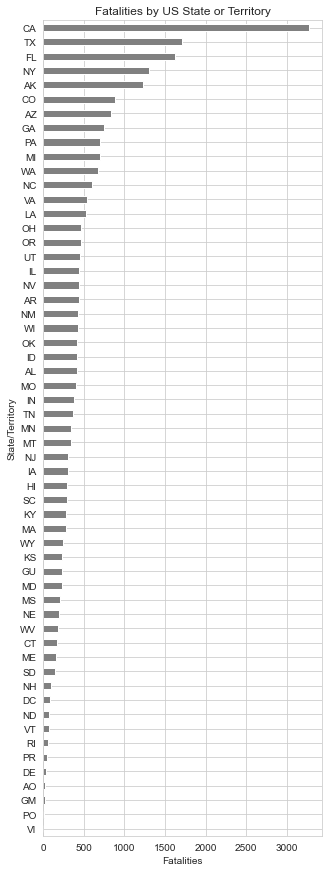

In [416]:
# Extract all unique US state abbreviations and store in new list
us_states = state_codes['Abbreviation'].unique()
# Classify location types based on whether or not they're in the US
merged_df['Location_Type'] = merged_df['State.Abbreviation'].apply(lambda x: 'US' if x in us_states else 'International')
# Filter to US data, group by 'State.Abbreviation', and sum up/sort total fatalities per state
us_data = merged_df[merged_df['Location_Type'] == 'US'].groupby('State.Abbreviation')['Total.Fatal.Injuries'].sum().sort_values()
# Filter to International data, group by 'State.Abbreviation', and sum/sort total fatalities per location
int_data = merged_df[merged_df['Location_Type'] == 'International'].groupby('State.Abbreviation')['Total.Fatal.Injuries'].sum().sort_values()


fig, ax = plt.subplots(figsize=(5, 15))
us_data.plot(kind='barh', color='gray', ax=ax)
ax.set_title('Fatalities by US State or Territory')
ax.set_xlabel('Fatalities')
ax.set_ylabel('State/Territory')
plt.show();

Looking at the above plot, we can't tell whether California is overrepresented due to their large population or if they do, in fact, have a higher number of fatalities. It's evident from the plot that this data needs to be normalized. To achieve this, I'll integrate population data into our existing dataframe.

In [417]:
pop_data = pd.read_csv('PopData.csv')
pop_data.head(50)

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
5,30,2,3,0,East North Central,47368637,47338744,47181948,47097779,-29893,...,11.204806,11.368786,-0.621578,-0.591707,0.783215,2.081402,-3.716477,-3.105991,-2.933262,-1.024589
6,30,2,4,0,West North Central,21616900,21622299,21654557,21689816,5399,...,10.741168,10.734911,0.698341,0.888466,0.845302,2.175646,-0.305983,-1.275044,0.539318,0.900601
7,20,3,0,0,South Region,126266262,126450613,127346029,128716192,184351,...,11.063685,10.983252,0.173186,0.547508,1.223200,3.239369,5.696892,6.779095,6.920092,10.018463
8,30,3,5,0,South Atlantic,66089861,66164801,66666348,67452940,74940,...,10.950398,11.011869,-0.417252,-0.162303,1.471567,3.880546,6.583049,7.809272,8.054617,11.689818
9,30,3,6,0,East South Central,19402323,19422567,19474372,19578002,20244,...,13.270042,13.260193,-1.813716,-1.593501,0.375351,0.959788,3.981856,5.887427,4.357207,6.847215


In [418]:
# Merge population data with merged_df, matching pop_data's 'NAME' column to merged_df's 'US_State' using a left join
merged_with_pop = merged_df.merge(pop_data[['NAME', 'POPESTIMATE2022']], left_on='US_State', right_on='NAME', how='left')
# Dropping redundant 'Name' column as we already have US State
merged_with_pop.drop('NAME', axis=1, inplace=True)
merged_with_pop.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State,Location_Type,POPESTIMATE2022
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,UNK,Cruise,Stinson 108-3,ID,Idaho,US,1939033.0
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,UNK,Unknown,Piper PA24-180,CA,California,US,39029342.0
2,20061025X01555,1974-08-30,"SALTVILLE, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,IMC,Cruise,Cessna 172M,VA,Virginia,US,8683619.0
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,IMC,Cruise,Rockwell 112,CA,California,US,39029342.0
4,20041105X01764,1979-08-02,"CANTON, OH",United States,Destroyed,Cessna,501,2.0,Turbo Fan,Personal,...,2.0,0.0,0.0,VMC,Approach,Cessna 501,OH,Ohio,US,11756058.0


In [419]:
# Calculate the normalized fatality rate (fatalities per million people) and add to new column
merged_with_pop['Fatalities per Million by State'] = (merged_with_pop['Total.Fatal.Injuries'] / 
                                                      merged_with_pop['POPESTIMATE2022']) * 10**6

# Group by US_State and sum the normalized fatality rates
state_fatalities = merged_with_pop.groupby('US_State')['Fatalities per Million by State'].sum().reset_index()

# Sort the data
sorted_fatalities = state_fatalities.sort_values(by='Fatalities per Million by State', ascending=False)
sorted_fatalities.head()

,US_State,Fatalities per Million by State
1,Alaska,1678.065059
59,Wyoming,412.810188
30,Montana,301.015169
15,Idaho,214.539928
35,New Mexico,203.469005


Having normalized the fatalities, I'll now visualize them to understand their distribution across the US.

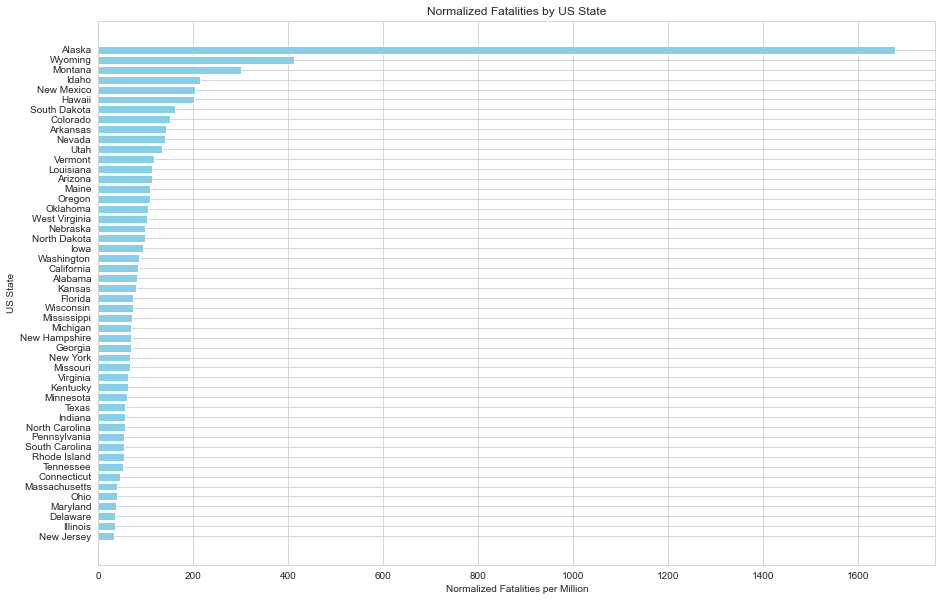

In [420]:
# List of valid US states
valid_us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                   'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
                   'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
                   'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
                   'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
                   'Wisconsin', 'Wyoming']

# Filter for valid US states from the sorted_fatalities dataframe
valid_states_fatalities = sorted_fatalities[sorted_fatalities['US_State'].isin(valid_us_states)]

plt.figure(figsize=(15,10))
plt.barh(valid_states_fatalities['US_State'], valid_states_fatalities['Fatalities per Million by State'], color='skyblue')
plt.xlabel('Normalized Fatalities per Million')
plt.ylabel('US State')
plt.title('Normalized Fatalities by US State')
plt.gca().invert_yaxis()  # To have the state with the highest fatalities at the top
plt.show();

### Observation:

After normalizing the data, it appears that Alaska exhibits a disproportionately high fatality rate. This observation may be influenced by the normalization process because Alaska's relatively small population means that a single accident can result in a statistically higher number of fatalities per million people compared to states with larger populations. 

Now that I've incorporated the populations of the individual U.S. states, I'll also integrate global population data.

In [421]:
world_pop = pd.read_csv('world_population.csv')
world_pop.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [422]:
all_pop = pd.merge(merged_with_pop, world_pop[['Country/Territory', '2022 Population', 'Continent']], left_on='Country', right_on='Country/Territory', how='left')

all_pop.drop('Country/Territory', axis=1, inplace=True)
all_pop.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,...,Weather.Condition,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State,Location_Type,POPESTIMATE2022,Fatalities per Million by State,2022 Population,Continent
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,...,UNK,Cruise,Stinson 108-3,ID,Idaho,US,1939033.0,1.031442,338289857.0,North America
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,...,UNK,Unknown,Piper PA24-180,CA,California,US,39029342.0,0.102487,338289857.0,North America
2,20061025X01555,1974-08-30,"SALTVILLE, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,...,IMC,Cruise,Cessna 172M,VA,Virginia,US,8683619.0,0.345478,338289857.0,North America
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,...,IMC,Cruise,Rockwell 112,CA,California,US,39029342.0,0.051243,338289857.0,North America
4,20041105X01764,1979-08-02,"CANTON, OH",United States,Destroyed,Cessna,501,2.0,Turbo Fan,Personal,...,VMC,Approach,Cessna 501,OH,Ohio,US,11756058.0,0.085063,338289857.0,North America


In [423]:
# Renaming newly merged columns for clarity 
all_pop.rename(columns={'2022 Population': 'Country Pop 2022', 'POPESTIMATE2022': 'State Pop 2022'}, inplace=True)

all_pop.isna().sum()

Event.Id                              0
Event.Date                            0
Location                              0
Country                               0
Aircraft.damage                       0
Make                                  0
Model                                 0
Number.of.Engines                     0
Engine.Type                           0
Purpose.of.flight                     0
Total.Fatal.Injuries                  0
Total.Serious.Injuries                0
Total.Minor.Injuries                  0
Total.Uninjured                       0
Weather.Condition                     0
Broad.phase.of.flight                 0
Make_Model                            0
State.Abbreviation                    0
US_State                              0
Location_Type                         0
State Pop 2022                     4886
Fatalities per Million by State    4886
Country Pop 2022                    291
Continent                           291
dtype: int64

For state populations, I'll adopt a zero imputation approach. In the context of populations, an absent value often suggests either an insignificantly small population or unavailable data. Specifically for my dataset, a NaN value in populations indicates it's not a U.S. state, making a zero imputation a logical choice.

In [424]:
all_pop['State Pop 2022'] = all_pop['State Pop 2022'].fillna(0)
all_pop['Fatalities per Million by State'] = all_pop['Fatalities per Million by State'].fillna(0)
all_pop['Country Pop 2022'] = all_pop['Country Pop 2022'].fillna(0)
missing_continent = all_pop[all_pop['Continent'].isna()].head(50)
missing_continent

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,...,Weather.Condition,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State,Location_Type,State Pop 2022,Fatalities per Million by State,Country Pop 2022,Continent
222,20020917X02008,1982-02-04,GULF OF MEXICO,International Waters,Substantial,Bell,206L-1,1.0,Turbo Shaft,Business,...,VMC,Takeoff,Bell 206L-1,Unknown,International Waters,International,0.0,0.0,0.0,NaN
377,20020917X02367,1982-02-23,ATLANTIC OCEAN,International Waters,Destroyed,Cessna,210,1.0,Reciprocating,Personal,...,VMC,Cruise,Cessna 210,Unknown,International Waters,International,0.0,0.0,0.0,NaN
431,20020917X02025,1982-03-02,HIGH ISLAND BLK,High Island,Destroyed,Bell,206B,1.0,Turbo Shaft,Unknown,...,VMC,Approach,Bell 206B,Unknown,TX,International,0.0,0.0,0.0,NaN
1271,20020917X04018,1982-05-29,ATLANTIC OCEAN,International Waters,Minor,Douglas,DC8-52,4.0,Turbo Fan,Unknown,...,VMC,Cruise,Douglas DC8-52,Unknown,International Waters,International,0.0,0.0,0.0,NaN
1272,20020917X03282,1982-05-29,HIGH ISLAND 389,High Island,Destroyed,Bell,206L-1,1.0,Turbo Shaft,Unknown,...,VMC,Landing,Bell 206L-1,Unknown,International Waters,International,0.0,0.0,0.0,NaN
1833,20020917X03361,1982-07-19,GULF OF MEXICO,International Waters,Substantial,Aerospatiale,AS-350D,1.0,Turbo Shaft,Unknown,...,VMC,Cruise,Aerospatiale AS-350D,Unknown,International Waters,International,0.0,0.0,0.0,NaN
2595,20020917X04616,1982-09-25,GULF OF MEXICO,International Waters,Substantial,Bell,206L-1,1.0,Turbo Shaft,Business,...,VMC,Landing,Bell 206L-1,Unknown,International Waters,International,0.0,0.0,0.0,NaN
3052,20020917X04643,1982-12-03,GULF OF MEXICO,International Waters,Destroyed,Bell,206L1,1.0,Turbo Shaft,Unknown,...,VMC,Approach,Bell 206L1,Unknown,International Waters,International,0.0,0.0,0.0,NaN
3763,20001214X42448,1983-03-23,HIGH ISLAND,High Island,Substantial,Beech,200,2.0,Turbo Prop,Business,...,VMC,Descent,Beech 200,Unknown,Foreign,International,0.0,0.0,0.0,NaN
3913,20001214X42760,1983-04-10,GULF OF MEXICO,International Waters,Destroyed,Cessna,310R,2.0,Reciprocating,Personal,...,VMC,Cruise,Cessna 310R,Unknown,International Waters,International,0.0,0.0,0.0,NaN


In [425]:
# Convert the 'Location' column to uppercase for case-insensitive matching and strip any whitespace
all_pop['Location'] = all_pop['Location'].str.upper().str.strip()

# Create list of special locations to identify those not tied to a continent
locations_to_replace = ['INTERNATIONAL WATERS', 'ATLANTIC OCEAN', 'GULF OF MEXICO', 'PACIFIC OCEAN', 'CARIBBEAN SEA']

# Replace the 'Continent' values based on the 'Location' values
all_pop.loc[all_pop['Location'].isin(locations_to_replace), 'Continent'] = 'International Waters'
all_pop.loc[all_pop['Location'].isin(['MISSING', 'MISSING ACFT']), 'Continent'] = 'Unknown'

missing_continent = all_pop[all_pop['Continent'].isna()]['Location'].unique()
missing_continent         

array(['HIGH ISLAND BLK', 'HIGH ISLAND 389', 'HIGH ISLAND',
       'HIGH ISLAND 582', 'SEOUL, KOREA, REPUBLIC OF',
       'HIGH ISLAND BLK595', 'HIGH ISLAND BLK298',
       'ST. MAARTEN, NETHERLANDS ANTILLES', 'ST. BARTHELEMY, WEST INDIES',
       '50 NW SAN JUAN', 'PINE CAY, TURKS AND CAICOS ISLANDS',
       'GRAND TURK ISL., TURKS AND CAICOS ISLANDS',
       'NEVIS ISLAND, WEST INDIES', 'HIGH ISLAND 474',
       'PROVIDENCIALES, TURKS AND CAICOS ISLANDS', 'HIGH ISLAND AO6',
       'ST. MAARTEN I., NETHERLANDS ANTILLES',
       'GREAT INAGUA, TURKS AND CAICOS ISLANDS', 'BLOCK 651A',
       'MIDDLE CAICOS, TURKS AND CAICOS ISLANDS',
       'LONG ISLAND, TURKS AND CAICOS ISLANDS', 'CONGO TOWN, CONGO',
       'HIGH ISLAND 467', 'HIGH ISLAND 334',
       'TRUK ISLAND, FEDERATED STATES OF MICRONESIA',
       'PORT OF SPAIN, TRINIDAD AND TOBAGO',
       'NORTH CAICOS, TURKS AND CAICOS ISLANDS', 'HIGH ISLAND A20',
       'ST JOHN ANTIGUA, ANTIGUA AND BARBUDA', 'HIGH ISLAND 116',
       'POHN

To finalize the clean up of the `Continent` column, I'll set up a mapping dictionary. This dictionary will outline how certain location keywords correspond to specific continents. Using a for loop, I'll iterate over each item in the dictionary. For each key in the dictionary, if a location contains that key, its corresponding continent value is assigned. This process ensures that locations are consistently and accurately categorized by continent.

In [426]:
mapping_dict = {
    'International Waters': 'International Waters',
    'Korea, Republic of': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Netherlands Antilles': 'North America',
    'St. Vincent and the Grenadines': 'North America',
    'Congo': 'Africa',
    'Central Africa': 'Africa',
    'Antarctica': 'Antarctica',
    'Unknown': 'Unknown',
    'UNK': 'Unknown'
}
# Update 'Continent' column based on the presence of a country or region name within the 'Location' column
# 'mapping_dict' contains a dictionary of country/region names as keys and their corresponding continents as values
# The loop iterates over the mapping dictionary, checks if the 'Location' contains the country/region name (key)
# and assigns the corresponding 'Continent' value from the dictionary to the matching rows
for key, value in mapping_dict.items():
    all_pop.loc[all_pop['Location'].str.contains(key, case=False, na=False), 'Continent'] = value

all_pop.isna().sum()  

Event.Id                            0
Event.Date                          0
Location                            0
Country                             0
Aircraft.damage                     0
Make                                0
Model                               0
Number.of.Engines                   0
Engine.Type                         0
Purpose.of.flight                   0
Total.Fatal.Injuries                0
Total.Serious.Injuries              0
Total.Minor.Injuries                0
Total.Uninjured                     0
Weather.Condition                   0
Broad.phase.of.flight               0
Make_Model                          0
State.Abbreviation                  0
US_State                            0
Location_Type                       0
State Pop 2022                      0
Fatalities per Million by State     0
Country Pop 2022                    0
Continent                          90
dtype: int64

With the dataset now thoroughly cleaned, I'm left with only 100 missing values in the 'Continent' column. Given the relatively small number of NaN entries compared to the overall dataset, it's acceptable to remove these rows from our analysis. 

In [427]:
all_pop.dropna(subset=['Continent'], inplace=True)
all_pop.isna().sum()

Event.Id                           0
Event.Date                         0
Location                           0
Country                            0
Aircraft.damage                    0
Make                               0
Model                              0
Number.of.Engines                  0
Engine.Type                        0
Purpose.of.flight                  0
Total.Fatal.Injuries               0
Total.Serious.Injuries             0
Total.Minor.Injuries               0
Total.Uninjured                    0
Weather.Condition                  0
Broad.phase.of.flight              0
Make_Model                         0
State.Abbreviation                 0
US_State                           0
Location_Type                      0
State Pop 2022                     0
Fatalities per Million by State    0
Country Pop 2022                   0
Continent                          0
dtype: int64

Now that I have population data, I have the option to compute the 'Fatalities per Million by Country' metric, which could prove useful for our analysis. This is done by dividing the total fatal injuries by the population of the country in 2022, and then multiplying by one million to get a standardized rate of fatalities per million people.

In [428]:
# Calculate the number of fatalities per million people for each country.
all_pop['Fatalities per Million by Country'] = (all_pop['Total.Fatal.Injuries'] / all_pop['Country Pop 2022']) * 10**6

all_pop.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,...,Broad.phase.of.flight,Make_Model,State.Abbreviation,US_State,Location_Type,State Pop 2022,Fatalities per Million by State,Country Pop 2022,Continent,Fatalities per Million by Country
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,...,Cruise,Stinson 108-3,ID,Idaho,US,1939033.0,1.031442,338289857.0,North America,0.005912
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,...,Unknown,Piper PA24-180,CA,California,US,39029342.0,0.102487,338289857.0,North America,0.011824
2,20061025X01555,1974-08-30,"SALTVILLE, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,...,Cruise,Cessna 172M,VA,Virginia,US,8683619.0,0.345478,338289857.0,North America,0.008868
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,...,Cruise,Rockwell 112,CA,California,US,39029342.0,0.051243,338289857.0,North America,0.005912
4,20041105X01764,1979-08-02,"CANTON, OH",United States,Destroyed,Cessna,501,2.0,Turbo Fan,Personal,...,Approach,Cessna 501,OH,Ohio,US,11756058.0,0.085063,338289857.0,North America,0.002956


Using zero to fill NaN values for the 'Fatalities per Million by Country' in all_pop is appropriate here because NaNs are presumed to represent countries with no reported fatalities. This implies that the absence of data corresponds to a fatality count of zero, thereby justifying the use of zero imputation for this particular analysis.

In [429]:
all_pop['Fatalities per Million by Country'] = all_pop['Fatalities per Million by Country'].fillna(0)

I can also proceed to standardize our column names for better readability. To accomplish this, I'll employ a function that replaces punctuation and underscores with spaces, and also capitalizes each word for consistent appearance. This function will be applied across all column names in our all_pop dataframe.

In [430]:
def replace_punctuation_with_space(column):
    return column.str.replace(r'[_\W]+', ' ').str.title()

all_pop.columns = replace_punctuation_with_space(all_pop.columns)

all_pop.columns

Index(['Event Id', 'Event Date', 'Location', 'Country', 'Aircraft Damage',
       'Make', 'Model', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Make Model', 'State Abbreviation', 'Us State',
       'Location Type', 'State Pop 2022', 'Fatalities Per Million By State',
       'Country Pop 2022', 'Continent', 'Fatalities Per Million By Country'],
      dtype='object')

To further refine our analysis of aircraft accidents, I'll need to account for production details that provide context for normalization. I'll integrate a dataset containing such information, which includes the number of aircraft built, their production start and end dates, and if applicable, retirement dates. This additional data will help us better understand the scale of accidents relative to the number of aircraft in service.

In [431]:
production_data = pd.read_csv('aircraft_data.csv')
production_data.head()

,Unnamed: 0,aircraft,nbBuilt,startDate,endDate,retired
0,0,Gotha G.III,25,1916,1916.0,NaN
1,1,Macchi C.205,262,1942,1944.0,1950
2,2,Antonov An-30,123,1971,1980.0,NaN
3,3,Blohm & Voss Ha 137,6,1935,1937.0,NaN
4,4,Panavia Tornado,992,1979,1998.0,NaN


To ensure consistency in our data and improve the accuracy of matching the Make/Model pairs across different datasets, I'll standardize the formatting of these entries in our all_pop dataset. I'll remove all whitespaces, punctuation, and convert all characters to lowercase. This will help to mitigate any discrepancies caused by varied formatting and facilitate a more reliable matching process. 

I will also repeat this process for production_data before merging the datasets.

In [432]:
all_pop['Make Model'] = [x.lower() for x in all_pop['Make Model']]
all_pop['Make Model'] = [x.replace('.', '') for x in all_pop['Make Model']]
all_pop['Make Model'] = [x.replace('-', '') for x in all_pop['Make Model']]
all_pop['Make Model'] = [x.replace(' ', '') for x in all_pop['Make Model']]
all_pop['Make Model']

0                          stinson1083
1                         piperpa24180
2                           cessna172m
3                          rockwell112
4                            cessna501
                     ...              
76208                     piperpa28151
76209                     bellanca7eca
76210    americanchampionaircraft8gcbc
76211                       cessna210n
76212                     piperpa24260
Name: Make Model, Length: 76123, dtype: object

In [433]:
production_data['Match'] = [x.lower() for x in production_data['aircraft']]
production_data['Match'] = [x.replace('.', '') for x in production_data['Match']]
production_data['Match'] = [x.replace('-', '') for x in production_data['Match']]
production_data['Match'] = [x.replace(' ', '') for x in production_data['Match']]
production_data.drop('Unnamed: 0', axis=1, inplace=True)
production_data.drop('aircraft', axis=1, inplace=True)

In [434]:
aviation_prod = pd.merge(all_pop, production_data, left_on='Make Model', right_on='Match', how='inner')
aviation_prod.shape

(9885, 30)

In [435]:
aviation_prod.isna().sum()

Event Id                                0
Event Date                              0
Location                                0
Country                                 0
Aircraft Damage                         0
Make                                    0
Model                                   0
Number Of Engines                       0
Engine Type                             0
Purpose Of Flight                       0
Total Fatal Injuries                    0
Total Serious Injuries                  0
Total Minor Injuries                    0
Total Uninjured                         0
Weather Condition                       0
Broad Phase Of Flight                   0
Make Model                              0
State Abbreviation                      0
Us State                                0
Location Type                           0
State Pop 2022                          0
Fatalities Per Million By State         0
Country Pop 2022                        0
Continent                         

In [436]:
nan_enddate = aviation_prod[aviation_prod['retired'].isnull()]
nan_enddate

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Purpose Of Flight,...,State Pop 2022,Fatalities Per Million By State,Country Pop 2022,Continent,Fatalities Per Million By Country,nbBuilt,startDate,endDate,retired,Match
0,20170710X52551,1979-09-17,"BOSTON, MA",United States,Substantial,Mcdonnell Douglas,DC9,2.0,Turbo Fan,Unknown,...,6981974.0,0.000000,338289857.0,North America,0.000000,976,1965,1982.0,NaN,mcdonnelldouglasdc9
1,20001214X35647,1985-02-10,"CHAMPAIGN, IL",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,12582032.0,0.000000,338289857.0,North America,0.000000,976,1965,1982.0,NaN,mcdonnelldouglasdc9
2,20001214X35949,1985-03-15,"SAN JOSE, CA",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,39029342.0,0.000000,338289857.0,North America,0.000000,976,1965,1982.0,NaN,mcdonnelldouglasdc9
3,20001213X25749,1988-05-10,"CHICAGO, IL",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,12582032.0,0.000000,338289857.0,North America,0.000000,976,1965,1982.0,NaN,mcdonnelldouglasdc9
4,20001213X27893,1989-03-23,"HOUSTON, TX",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,30029572.0,0.000000,338289857.0,North America,0.000000,976,1965,1982.0,NaN,mcdonnelldouglasdc9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9880,20221115106294,2022-11-14,"OPA-LOCKA, FL",United States,Substantial,ANTONOV,AN2,1.0,Reciprocating,Public - Govt,...,22244823.0,0.000000,338289857.0,North America,0.000000,18000,1947,2001.0,NaN,antonovan2
9881,20180927X41915,2018-09-27,"GREENVILLE, SC",United States,Substantial,Dassault,FALCON 50,3.0,Turbo Fan,Unknown,...,5282634.0,0.378599,338289857.0,North America,0.005912,352,1976,2008.0,NaN,dassaultfalcon50
9882,20191018X02019,2019-10-18,"UNALASKA, AK",United States,Substantial,Saab,2000,2.0,Turbo Prop,Unknown,...,733583.0,1.363172,338289857.0,North America,0.002956,63,1992,NaN,NaN,saab2000
9883,20200824X01445,2020-08-24,"RENO, NV",United States,Substantial,Northrop,F5,2.0,Turbo Jet,Business,...,3177772.0,0.000000,338289857.0,North America,0.000000,1399,1959,1987.0,NaN,northropf5


The nan_enddate dataframe shows that several aircraft models lack a recorded retirement date. This absence of data suggests these models may still be operational. To maintain dataset consistency, I will impute these missing values with a placeholder. The year 3000 will serve as our chosen imputation value, being a future year that clearly indicates the entry as a stand-in for unknown retirement dates.

In [437]:
# Change nan values to 2027.0 as a placeholder to capture aircraft still in use
aviation_prod['endDate'].fillna(3000.0, inplace=True)
aviation_prod.isna().sum()

Event Id                                0
Event Date                              0
Location                                0
Country                                 0
Aircraft Damage                         0
Make                                    0
Model                                   0
Number Of Engines                       0
Engine Type                             0
Purpose Of Flight                       0
Total Fatal Injuries                    0
Total Serious Injuries                  0
Total Minor Injuries                    0
Total Uninjured                         0
Weather Condition                       0
Broad Phase Of Flight                   0
Make Model                              0
State Abbreviation                      0
Us State                                0
Location Type                           0
State Pop 2022                          0
Fatalities Per Million By State         0
Country Pop 2022                        0
Continent                         

In [438]:
# Dropping 'retired' column as it's not pertinent to our analysis
aviation_prod.drop('retired', axis=1, inplace=True)

In [439]:
# Changing the name of 'nbBuilt' for clarity 
aviation_prod = aviation_prod.rename(columns={'nbBuilt': 'Number Built'})

In [440]:
aviation_prod.head()

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Purpose Of Flight,...,Location Type,State Pop 2022,Fatalities Per Million By State,Country Pop 2022,Continent,Fatalities Per Million By Country,Number Built,startDate,endDate,Match
0,20170710X52551,1979-09-17,"BOSTON, MA",United States,Substantial,Mcdonnell Douglas,DC9,2.0,Turbo Fan,Unknown,...,US,6981974.0,0.0,338289857.0,North America,0.0,976,1965,1982.0,mcdonnelldouglasdc9
1,20001214X35647,1985-02-10,"CHAMPAIGN, IL",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,US,12582032.0,0.0,338289857.0,North America,0.0,976,1965,1982.0,mcdonnelldouglasdc9
2,20001214X35949,1985-03-15,"SAN JOSE, CA",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,US,39029342.0,0.0,338289857.0,North America,0.0,976,1965,1982.0,mcdonnelldouglasdc9
3,20001213X25749,1988-05-10,"CHICAGO, IL",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,US,12582032.0,0.0,338289857.0,North America,0.0,976,1965,1982.0,mcdonnelldouglasdc9
4,20001213X27893,1989-03-23,"HOUSTON, TX",United States,Minor,Mcdonnell Douglas,DC-9,2.0,Turbo Fan,Unknown,...,US,30029572.0,0.0,338289857.0,North America,0.0,976,1965,1982.0,mcdonnelldouglasdc9


In [441]:
aviation_prod.shape

(9885, 29)

In [442]:
aviation_prod.columns

Index(['Event Id', 'Event Date', 'Location', 'Country', 'Aircraft Damage',
       'Make', 'Model', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Make Model', 'State Abbreviation', 'Us State',
       'Location Type', 'State Pop 2022', 'Fatalities Per Million By State',
       'Country Pop 2022', 'Continent', 'Fatalities Per Million By Country',
       'Number Built', 'startDate', 'endDate', 'Match'],
      dtype='object')

In [443]:
aviation_prod.shape

(9885, 29)

In [444]:
aviation_prod['Year'] = pd.to_datetime(aviation_prod['Event Date']).dt.year

In [445]:
production_data.columns

Index(['nbBuilt', 'startDate', 'endDate', 'retired', 'Match'], dtype='object')

Next, the goal is to evaluate the safety of different aircraft models by examining historical accident data. To do this, I calculate several metrics:

`median_fatalities`: This is the median number of fatal injuries per aircraft model, calculated across all accidents involving each model. The median is used instead of the average to lessen the effect of extreme values.

`median_serious_injuries`: Similar to median fatalities, this is the median number of serious injuries per aircraft model, which provides a measure of the severity of accidents that don't necessarily result in death but in significant harm.

`percentage_destroyed`: This metric represents the proportion of total accidents for each aircraft model that resulted in the complete destruction of the aircraft. It's a measure of the most severe outcome for the aircraft itself.

These metrics are compiled into a DataFrame called severity_metrics, with each aircraft model as a row and the calculated safety metrics as columns. Any missing values are filled with zero, which assumes that if there's no data for a particular safety metric, then there were no incidents of that type.

Next, this new severity_metrics DataFrame is merged with another DataFrame called accidents_by_aircraft, which contains the normalized accident rate per aircraft model. This merging process aligns the safety metrics with the corresponding accident rates for a comprehensive safety profile of each aircraft model.

The resulting combined_data DataFrame holds a detailed record for each aircraft model, including how often they're involved in accidents and the typical severity of those accidents, which can be used for further analysis or to inform safety improvements.

In [446]:
# if 'Make Model' not in aviation_df.columns:
    #aviation_df['Make Model'] = aviation_df['Make'] + ' ' + aviation_df['Model']

# Calculate median fatalities and serious injuries by Make Model
median_fatalities = aviation_prod.groupby('Make Model')['Total Fatal Injuries'].median()
median_serious_injuries = aviation_prod.groupby('Make Model')['Total Serious Injuries'].median()

# Calculate the percentage of accidents resulting in total aircraft loss by Make Model
percentage_destroyed = (aviation_prod[aviation_prod['Aircraft Damage'] == 'Destroyed'].groupby('Make Model').size()) / aviation_prod.groupby('Make Model').size()

# Create a DataFrame for severity metrics
severity_metrics = pd.DataFrame({
    'Median Fatalities': median_fatalities,
    'Median Serious Injuries': median_serious_injuries,
    'Percentage Destroyed': percentage_destroyed
}).fillna(0)  

# Calculate the total number of accidents for each Make Model in the example dataset
accidents_count = aviation_prod.groupby('Make Model').size().reset_index(name='Accident Count')

production_data.rename(columns={'Match': 'Make Model'}, inplace=True)
# Merge the accidents count with the production data
accidents_by_aircraft = accidents_count.merge(production_data, on='Make Model', how='left')

# Calculate the normalized accident rate per aircraft for the example dataset
accidents_by_aircraft['Normalized Accident Rate per Aircraft'] = (
    accidents_by_aircraft['Accident Count'] / accidents_by_aircraft['nbBuilt']
).fillna(0)  # Fill NaN values with zero

# Merge the severity metrics with the normalized accident rates
combined_data = accidents_by_aircraft.merge(severity_metrics, on='Make Model', how='left').fillna(0)

# Display the combined data for the example dataset
combined_data.head(50)

,Make Model,Accident Count,nbBuilt,startDate,endDate,retired,Normalized Accident Rate per Aircraft,Median Fatalities,Median Serious Injuries,Percentage Destroyed
0,aeroncachampion,1,7200,1946,1951.0,0,0.000139,0.0,0.0,0.000000
1,air&space18a,12,68,1965,2000.0,0,0.176471,0.0,0.0,0.166667
2,airbusa300,9,561,1971,2007.0,0,0.016043,0.0,0.0,0.000000
3,airbusa310,1,255,1983,1998.0,0,0.003922,152.0,0.0,1.000000
4,airbusa319,15,1456,1994,0.0,0,0.010302,0.0,0.0,0.000000
5,airbusa330,32,1297,1992,0.0,0,0.024672,0.0,0.0,0.062500
6,airbusa380,4,195,2005,0.0,0,0.020513,0.0,0.0,0.000000
7,antonovan2,2,18000,1947,2001.0,0,0.000111,0.0,0.0,0.000000
8,atr42,3,436,1984,0.0,0,0.006881,0.0,0.0,0.000000
9,atr72,1,836,1988,0.0,0,0.001196,0.0,1.0,1.000000


To determine the safest aircraft, I assess several factors and assign ranks to each Make and Model based on these factors:

`Fatalities Rank`: Aircraft with fewer median fatalities receive a better rank (i.e., closer to 1). This rank is weighted more heavily in the overall safety score to reflect the severity of fatalities.

`Serious Injuries Rank`: Aircraft with fewer median serious injuries also receive a better rank, with less weight than fatalities in the overall safety score.

`Destruction Rank`: A lower percentage of aircraft destroyed results in a better rank. This is also given a higher weight, similar to fatalities, as it indicates a more severe outcome.

`Accident Rate Rank`: A lower normalized accident rate per aircraft leads to a better rank, which is weighted less to balance the impact on the overall safety score.

Each rank is multiplied by its respective weight, and these weighted ranks are summed to derive the 'Overall Safety Score.' The lower this score, the higher the aircraft's safety ranking.

Thus, the `Overall Safety Rank` inversely correlates with the `Overall Safety Score`: the lower the score, the safer the aircraft. This allows us to prioritize Make and Model based on their overall safety as determined by our weighted ranking system.

In [447]:
weights = {
    'Fatalities Rank': 4,
    'Serious Injuries Rank': 2,
    'Destruction Rank': 4,
    'Accident Rate Rank': 2
}

combined_data['Fatalities Rank'] = combined_data['Median Fatalities'].rank(method='min', ascending=True)
combined_data['Serious Injuries Rank'] = combined_data['Median Serious Injuries'].rank(method='min', ascending=True)

combined_data['Destruction Rank'] = combined_data['Percentage Destroyed'].rank(method='min', ascending=True)


combined_data['Accident Rate Rank'] = combined_data['Normalized Accident Rate per Aircraft'].rank(method='min', ascending=True)

for rank_column, weight in weights.items():
    combined_data[rank_column + ' Weighted'] = combined_data[rank_column] * weight

# Sum the weighted ranks to get the 'Overall Safety Rank' - lower sum is better, so we invert the final ranking
combined_data['Overall Safety Score'] = combined_data[[rank_column + ' Weighted' for rank_column in weights]].sum(axis=1)
combined_data['Overall Safety Rank'] = combined_data['Overall Safety Score'].rank(method='min', ascending=True)

# Confirm changes
combined_data.head()

,Make Model,Accident Count,nbBuilt,startDate,endDate,retired,Normalized Accident Rate per Aircraft,Median Fatalities,Median Serious Injuries,Percentage Destroyed,Fatalities Rank,Serious Injuries Rank,Destruction Rank,Accident Rate Rank,Fatalities Rank Weighted,Serious Injuries Rank Weighted,Destruction Rank Weighted,Accident Rate Rank Weighted,Overall Safety Score,Overall Safety Rank
0,aeroncachampion,1,7200,1946,1951.0,0,0.000139,0.0,0.0,0.000000,1.0,1.0,1.0,2.0,4.0,2.0,4.0,4.0,14.0,2.0
1,air&space18a,12,68,1965,2000.0,0,0.176471,0.0,0.0,0.166667,1.0,1.0,72.0,114.0,4.0,2.0,288.0,228.0,522.0,92.0
2,airbusa300,9,561,1971,2007.0,0,0.016043,0.0,0.0,0.000000,1.0,1.0,1.0,59.0,4.0,2.0,4.0,118.0,128.0,28.0
3,airbusa310,1,255,1983,1998.0,0,0.003922,152.0,0.0,1.000000,116.0,1.0,108.0,31.0,464.0,2.0,432.0,62.0,960.0,115.0
4,airbusa319,15,1456,1994,0.0,0,0.010302,0.0,0.0,0.000000,1.0,1.0,1.0,48.0,4.0,2.0,4.0,96.0,106.0,24.0


In [448]:
# Calculate the overall range of safety scores for the entire dataset
overall_safety_score_range = combined_data['Overall Safety Score'].max() - combined_data['Overall Safety Score'].min()

# Now, sort the DataFrame by 'Overall Safety Rank' to identify the 20 safest aircraft
# and calculate the range of their safety scores.
sorted_by_safety_rank = combined_data.sort_values('Overall Safety Rank')
top_20_safest = sorted_by_safety_rank.head(20)
top_20_safety_score_range = top_20_safest['Overall Safety Score'].max() - top_20_safest['Overall Safety Score'].min()

# Output the ranges
overall_safety_score_range, top_20_safety_score_range

(998.0, 76.0)

I can now combine these ranks with our main dataset to form an extensive dataframe that encompasses relevant details concerning aircraft accidents, incidents, and geographical data.

In [449]:
final_data = aviation_prod.merge(combined_data, on='Make Model', how='left')

final_data = final_data.sort_values(by='Normalized Accident Rate per Aircraft', ascending=False)

In [450]:
final_data.columns

Index(['Event Id', 'Event Date', 'Location', 'Country', 'Aircraft Damage',
       'Make', 'Model', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Make Model', 'State Abbreviation', 'Us State',
       'Location Type', 'State Pop 2022', 'Fatalities Per Million By State',
       'Country Pop 2022', 'Continent', 'Fatalities Per Million By Country',
       'Number Built', 'startDate_x', 'endDate_x', 'Match', 'Year',
       'Accident Count', 'nbBuilt', 'startDate_y', 'endDate_y', 'retired',
       'Normalized Accident Rate per Aircraft', 'Median Fatalities',
       'Median Serious Injuries', 'Percentage Destroyed', 'Fatalities Rank',
       'Serious Injuries Rank', 'Destruction Rank', 'Accident Rate Rank',
       'Fatalities Rank Weighted', 'Serious Injuries Rank Weighted',
       'Destruction Rank Weighted', 'Accident Rate

I can now move forward with analyzing the categorical variables and their association with the Overall Safety Rank to identify which factors influence the safety of different aircraft. This will be accomplished by one-hot encoding the categorical variables, followed by calculating the Pearson correlation coefficient for each encoded variable. This process will help me determine the impact of each categorical factor on the perceived safety of the aircraft. 


To begin, I'll transform the categorical variables into a format suitable for statistical analysis. I'll use the pd.get_dummies method from the pandas library to convert these categorical variables into dummy variables, also known as one-hot encoded variables. Here's a step-by-step breakdown of how we accomplish this:

1. **Select the Categorical Variable**: Identify the categorical column(s) that to one-hot encode. To start, I'll use `Engine Type`

2. **Apply pd.get_dummies**: Use the pd.get_dummies function on the categorical column(s). 

3. **Concatenate the Original DataFrame**: Combine the new dummy variables with the original DataFrame using pd.concat, setting axis=1 to concatenate column-wise.

4. **Correlation Calculation**: With the encoded DataFrame, calculate the Pearson correlation coefficients between the dummy variables and the 'Overall Safety Rank'.

In [451]:
purpose_dummies = pd.get_dummies(final_data['Engine Type'])

# Combine the one-hot encoded columns back to the original DataFrame
final_data_encoded = pd.concat([all_pop, purpose_dummies], axis=1)

# Calculate Pearson correlation coefficient for each dummy variable with the 'Total Fatal Injuries' column
correlations = {}
for column in purpose_dummies.columns:
    correlations[column] = final_data['Overall Safety Rank'].corr(final_data_encoded[column])

# Convert the correlations dictionary to a pandas Series for easy viewing
correlation_series = pd.Series(correlations)
correlation_series.head(50) 

Reciprocating    0.302897
Turbo Fan       -0.484896
Turbo Jet       -0.035124
Turbo Prop      -0.013468
Turbo Shaft      0.196592
Unknown         -0.059302
dtype: float64

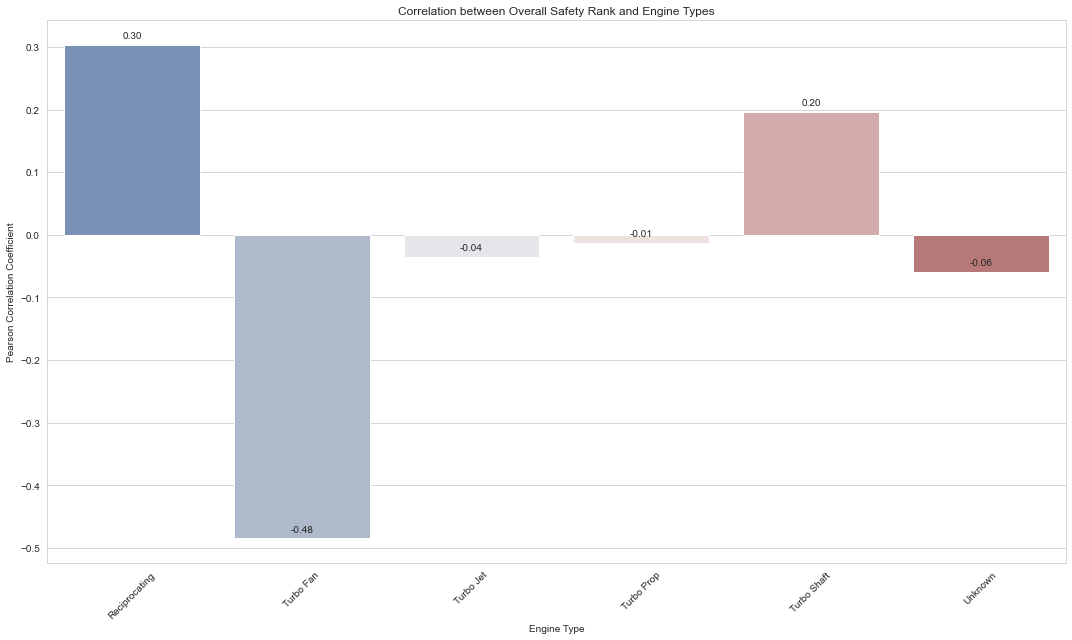

In [452]:
# Create a pandas Series from the dictionary
#correlation_series = pd.Series(correlation_data)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
    
# Create a bar plot using Seaborn
plt.figure(figsize=(15, 9))
ax = sns.barplot(x=correlation_series.index, y=correlation_series.values, palette="vlag")

# Sourced from https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title('Correlation between Overall Safety Rank and Engine Types')
plt.xlabel('Engine Type')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show();

### Observation

**Reciprocating**: A correlation of 0.287029 suggests a weak positive linear relationship with the 'Overall Safety Rank'. This means that aircraft with reciprocating engines are slightly more likely to have a higher (worse) safety rank.

**Turbo Fan**: A correlation of -0.466341 suggests a moderate negative linear relationship. Aircraft with turbofan engines tend to have a lower (better) safety rank.

**Turbo Jet**: A correlation of -0.019462 indicates a very weak negative linear relationship. There's almost no linear association between turbojet engines and the safety rank.

**Turbo Prop**: A correlation of -0.020298 indicates a very weak negative linear relationship. There's little association between turbo prot engines and safety rank.

**Turbo Shaft**: A correlation of 0.196915 suggests a weak to moderate positive linear relationship. Aircraft with turboshaft engines tend to have a higher (worse) safety rank.

**Unknown**: A correlation of -0.059154 indicates a very weak negative linear relationship, implying that the safety rank is nearly independent of whether the engine type is unknown.

In [453]:
# One-hot encode the 'Aircraft Damage' column
purpose_dummies = pd.get_dummies(final_data['Aircraft Damage'])

# Combine the one-hot encoded columns back to the original DataFrame
final_data_encoded = pd.concat([final_data, purpose_dummies], axis=1)

# Calculate Pearson correlation coefficient for each dummy variable with the normalized accident rate
correlations = {}
for column in purpose_dummies.columns:
    correlations[column] = final_data['Overall Safety Rank'].corr(final_data_encoded[column])

# Convert the correlations dictionary to a pandas Series for easy viewing
correlation_series = pd.Series(correlations)
correlation_series.head(50)

Destroyed      0.159790
Minor         -0.392126
Substantial    0.147563
dtype: float64

**Destroyed (0.157989)**: A weak positive correlation here would mean that less safe aircraft (those with a higher safety rank number) are slightly more likely to have accidents that result in the aircraft being destroyed.

**Minor (-0.381276)**: The moderate negative correlation would imply that less safe aircraft are less likely to have accidents that result in only minor damage. This could suggest that when less safe aircraft have accidents, they are more severe.

**Substantial (0.141393)**: A weak positive correlation suggests that less safe aircraft are slightly more likely to have accidents that result in substantial damage.

Given this context, the negative correlation with 'Minor' is particularly significant. It suggests that aircraft that are considered less safe not only have more accidents but that these accidents are also more likely to result in substantial or complete destruction rather than minor damage.

In [454]:
# One-hot encode the 'Purpose_of_Flight' column
purpose_dummies = pd.get_dummies(final_data['Purpose Of Flight'])

# Combine the one-hot encoded columns back to the original DataFrame
final_data_encoded = pd.concat([final_data, purpose_dummies], axis=1)

# Calculate Pearson correlation coefficient for each dummy variable with the normalized accident rate
correlations = {}
for column in purpose_dummies.columns:
    correlations[column] = final_data['Normalized Accident Rate per Aircraft'].corr(final_data_encoded[column])

# Convert the correlations dictionary to a pandas Series for easy viewing
correlation_series = pd.Series(correlations)
correlation_series.head(50)

ASHO                 -0.005189
Aerial Application   -0.078693
Aerial Observation   -0.004459
Banner Tow           -0.004981
Business             -0.074955
External Load        -0.015916
Ferry                -0.025924
Firefighting         -0.010416
Flight Test          -0.017505
Instructional         0.454559
Personal             -0.142401
Positioning          -0.041999
Public               -0.024160
Public - Govt        -0.013246
Skydiving            -0.010724
Unknown              -0.227701
dtype: float64

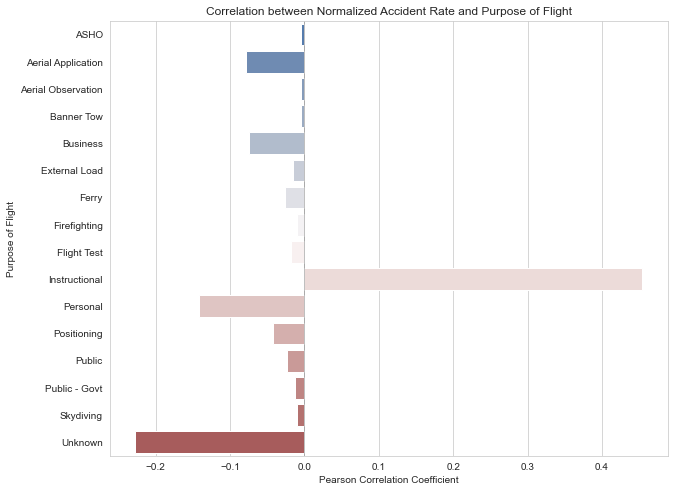

In [455]:
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_series.values, y=correlation_series.index, palette="vlag")
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Purpose of Flight')
plt.title('Correlation between Normalized Accident Rate and Purpose of Flight')
plt.axvline(x=0, color='grey', linewidth=0.5)  # Add a line at x=0 for reference
plt.show();

Observing the bar plot, I can deduce several points:

1. **Instructional flights** have a significantly higher correlation with the normalized accident rate, indicating that these flights tend to have more accidents per aircraft compared to other flight purposes. This could be due to the inherent risks involved with training new pilots, where instructional flights often involve maneuvers or situations that have higher risk factors.


2. **Personal flights** and **Unknown** purposes also show negative correlations with the normalized accident rate, albeit to a lesser extent than instructional flights. This suggests that these flight categories have fewer accidents per aircraft, which could be due to a variety of factors including the nature and frequency of these flights.


3. The majority of flight purposes show a negative correlation, with many close to zero, which indicates a very weak relationship with the normalized accident rate. This suggests that for many types of flights, the purpose may not be a strong indicator of the likelihood of accidents per aircraft.


4. There's a notable absence of a strong positive correlation for any purpose other than instructional flights, which could imply that no single flight purpose (besides instructional) stands out as being particularly hazardous when considering the normalized accident rate.


5. The data suggests that flight purpose can be a factor in accident rates, but the strength of the correlation varies widely depending on the type of flight. 

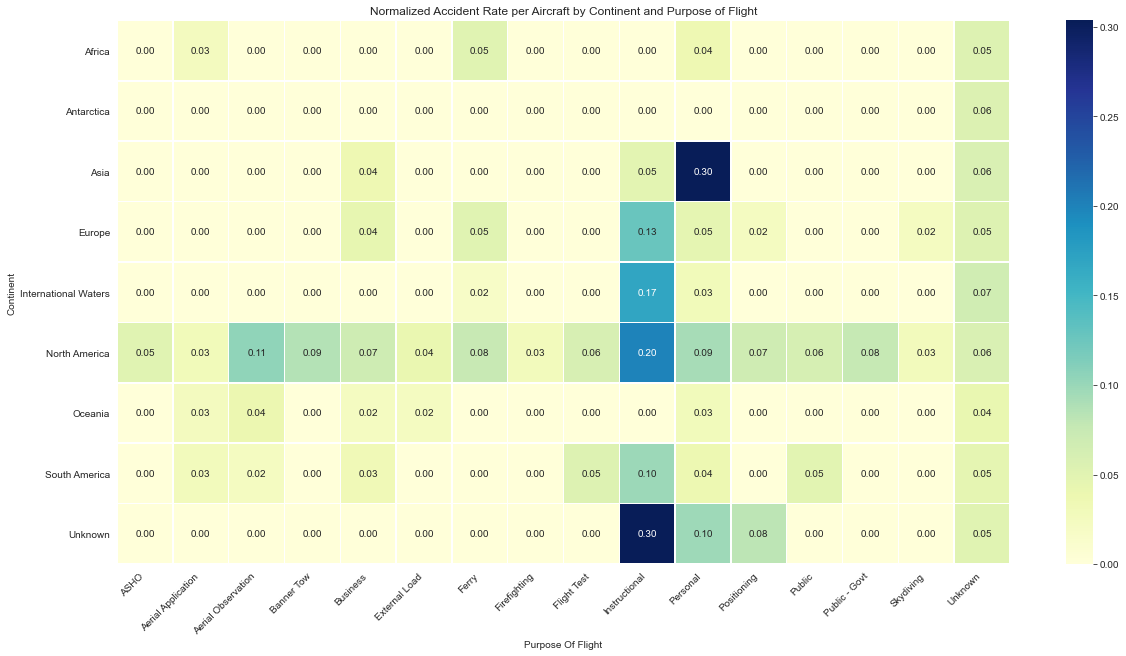

In [456]:
grouped = final_data.groupby(['Continent', 'Purpose Of Flight'])['Normalized Accident Rate per Aircraft'].mean().reset_index()

heatmap_data = grouped.pivot_table(index='Continent', columns=['Purpose Of Flight'], 
                                   values='Normalized Accident Rate per Aircraft', fill_value=0)

plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Normalized Accident Rate per Aircraft by Continent and Purpose of Flight')
plt.ylabel('Continent')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show();

The heatmap indicates that North America has marginally higher accident rates in comparison to other continents. However, this observation alone doesn't necessarily imply that flying in North America is less safe. To fully understand the impact of these accidents, I must also consider the extent of damage sustained by the aircraft involved. The Pearson correlation coefficient between 'Minor' `Aircraft Damage` and `Overall Safety Rank` is -0.381276, which suggests a moderate inverse relationship. This means that if accidents predominantly result in minor damage rather than total destruction, the `Overall Safety Rank` is better (indicating safer aircraft). Therefore, when evaluating safety, it's important to consider both the frequency and severity of accidents

In [457]:
# Filter the data by 'Aircraft Damage' for minor damage
minor_damage_df = final_data[final_data['Aircraft Damage'] == 'Minor']

# Group by 'Continent' and count minor accidents
minor_damage_counts = minor_damage_df.groupby('Continent').size()

# Group by 'Continent' on the entire dataset and count total accidents
total_accidents_per_continent = final_data.groupby('Continent').size()

# Normalize the minor accidents by dividing by the total number of accidents
normalized_minor_accident_rate = minor_damage_counts / total_accidents_per_continent

# Compare North America's normalized minor accident rate to other continents
north_america_minor_accidents_rate = normalized_minor_accident_rate.get('North America', 0)
other_continents_minor_accidents_rate = normalized_minor_accident_rate.drop('North America', errors='ignore')
north_america_minor_accidents_rate, other_continents_minor_accidents_rate

(0.04313099041533546,
 Continent
 Africa                  0.532710
 Antarctica              1.000000
 Asia                    0.597444
 Europe                  0.633075
 International Waters    0.250000
 Oceania                 0.611650
 South America           0.385027
 Unknown                 0.300000
 dtype: float64)

Based on the code output, it looks like there is a significant difference between the normalized minor accident rates across continents. North America has a minor accident rate of approximately 0.043, which is considerably lower than the rates for other continents such as Africa, Asia, Europe, and Oceania, which are all above 0.5.

These results suggest that a smaller proportion of aircraft accidents in North America result in minor damage compared to these other continents. However, it is premature to say that North America overall has better or worse safety outcomes. 

In [458]:
destroyed_damage_df = final_data[final_data['Aircraft Damage'] == 'Destroyed']

destroyed_damage_counts = destroyed_damage_df.groupby('Continent').size()

total_accidents_per_continent = final_data.groupby('Continent').size()

normalized_destroyed_accident_rate = destroyed_damage_counts / total_accidents_per_continent

north_america_destroyed_accidents_rate = normalized_destroyed_accident_rate.get('North America', 0)
other_continents_destroyed_accidents_rate = normalized_destroyed_accident_rate.drop('North America', errors='ignore')
north_america_destroyed_accidents_rate, other_continents_destroyed_accidents_rate

(0.13886353263350068,
 Continent
 Africa                  0.214953
 Antarctica                   NaN
 Asia                    0.102236
 Europe                  0.142119
 International Waters    0.750000
 Oceania                 0.174757
 South America           0.165775
 Unknown                 0.300000
 dtype: float64)

When comparing the normalized rates of accidents resulting in 'Destroyed' aircraft to those resulting in 'Minor' damage, there are distinct differences:

### North America:
**Minor Damage Rate**: Approximately 0.043

**Destroyed Rate**: Approximately 0.139

The rate of accidents resulting in 'Destroyed' aircraft in North America is higher than the rate of accidents resulting in 'Minor' damage. This could imply that when accidents occur in North America, they are more likely to result in significant destruction rather than minor damage. 

### Other Continents:
Most other continents have higher rates of 'Minor' damage compared to 'Destroyed' damage. For instance, Asia has a minor damage rate of approximately 0.595 compared to a destroyed rate of 0.111.
This indicates that in regions such as Asia, Europe, and Africa, accidents are more likely to result in minor damage than in total destruction.

However, 'International Waters' stands out with a significantly higher destroyed rate (0.75) compared to its minor damage rate (0.25), suggesting accidents in these areas are more often severe.

Next, we can further examine geographic influences over aircraft safety by visualizing the relationship between Continents and normalized destruction rates. 

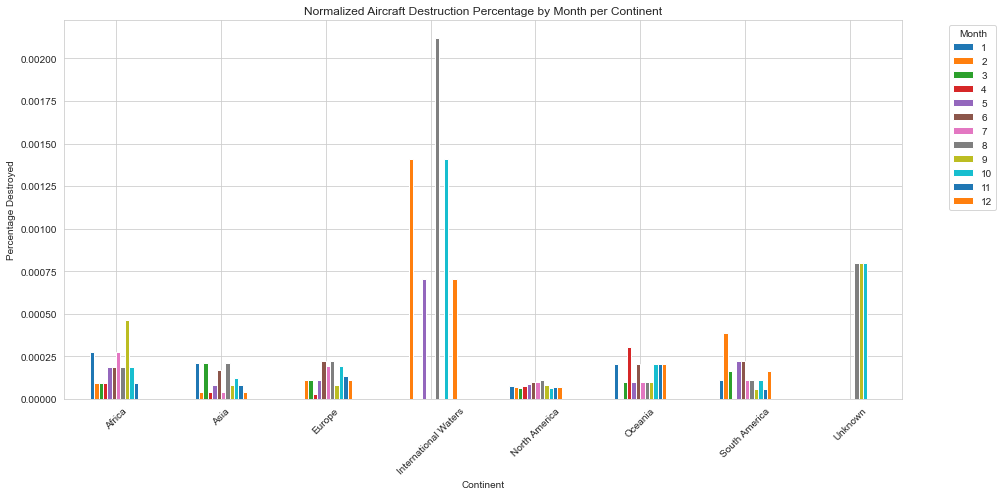

In [459]:
final_data.set_index('Event Date', inplace=True)

destroyed_data = final_data[final_data['Aircraft Damage'] == 'Destroyed']

monthly_continent_destruction = destroyed_data.groupby(['Continent', destroyed_data.index.month]).size()

# Now let's get the total number of aircraft built per continent
total_built_per_continent = final_data.groupby('Continent')['Number Built'].sum()

# Calculate the normalized destruction rate by dividing the monthly destruction counts by the total built per continent
normalized_destruction_rate_continent = monthly_continent_destruction.div(total_built_per_continent, level='Continent')

normalized_destruction_rate_continent *= 100

# Unstack the Series to get a DataFrame where the index is 'Continent' and columns are months
destruction_rate_df = normalized_destruction_rate_continent.unstack(level=-1)

destruction_rate_df.plot(kind='bar', figsize=(14, 7), legend=True)

plt.xlabel('Continent')
plt.ylabel('Percentage Destroyed')
plt.title('Normalized Aircraft Destruction Percentage by Month per Continent')
plt.xticks(rotation=45)  
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  


plt.tight_layout()
plt.show();

The chart indicates that flights over International Waters present a significantly higher risk compared to other regions, particularly North America which exhibits much lower percentages of destroyed incidents. A closer examination of the monthly data reveals that February, August, and October are months with heightened risk in International Waters. To gain a clearer understanding of aircraft safety, it is also beneficial to delve deeper into the data for North America.

To understand patterns in aircraft safety, I'll analyze the normalized accident rates by month. This will show me if there are specific times of the year that are more prone to accidents. Then, I'll look at the severity of accidents to determine if certain months not only have a higher frequency of accidents but also more severe outcomes. This two-pronged approach gives me a fuller picture of the risk associated with flying in different months. To further refine the data to suit our needs, I'll filter to only include events that occured after 1990 to get a clearer picture of recent trends. I will do so in several steps:

1. Filter the dataset to include only accidents that occured in the United States and from 1990 to the latest year in the dataset. 


2. The filtered dataset us_accidents is then grouped by month of the accident date, where the size of each group is calculated telling us the total number of accidents for each month accross all years since 1990. 


3. The span of years is calculated by subtracting the earliest year from the latest year (using .min() and .max() methods) and adding 1. 


4. The average number of accidents per month is calculated by dividing the total accidents for each month by the span of years. 


5. The average monthly accidents are normalized to sum up to 1. This is done by dividing each month's average accidents by the sum of all months' average accidents. 


6. Visualize the data. 

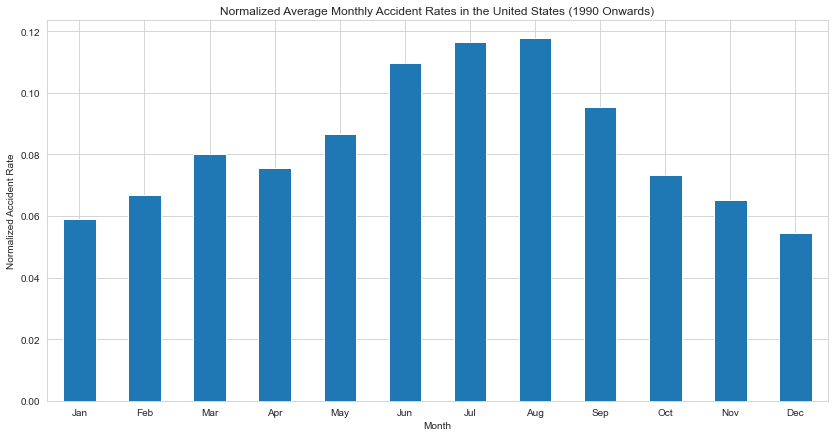

In [460]:
# Filter the data for accidents that occurred in the United States from 1990 onwards (& filtering out states flagged 'Foreign')
us_accidents = final_data[(final_data['Country'] == 'United States') & (final_data.index.year >= 1990) 
                          & (final_data['Us State'] != 'Foreign')]

# Group by month and calculate the total number of accidents for each month across all years
monthly_accidents_aggregate = us_accidents.groupby(us_accidents.index.month).size()

# Calculate the span of years from the earliest to the latest year in the dataset
earliest_year = us_accidents.index.year.min()
latest_year = us_accidents.index.year.max()
span_of_years = latest_year - earliest_year + 1  # Including both the first and last year

# Calculate the average number of accidents for each month over the span of years
average_monthly_accidents = monthly_accidents_aggregate / span_of_years

# Normalize the average monthly accident counts to sum to 1
normalized_average_monthly_accidents = average_monthly_accidents / average_monthly_accidents.sum()

# Plot the normalized average monthly accident rates
normalized_average_monthly_accidents.plot(kind='bar', figsize=(14, 7))
plt.title('Normalized Average Monthly Accident Rates in the United States (1990 Onwards)')
plt.xlabel('Month')
plt.ylabel('Normalized Accident Rate')
plt.grid(True)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=0)
plt.show();

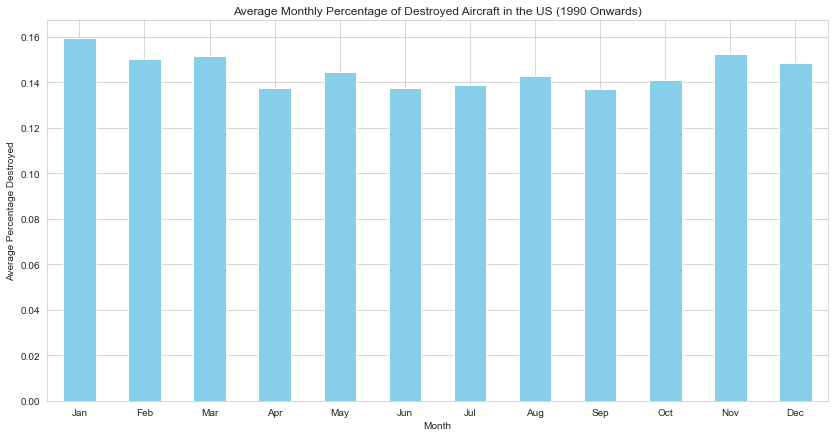

In [461]:
# Group by month and calculate the mean percentage destroyed for each month
monthly_percentage_destroyed_us = us_accidents.groupby(us_accidents.index.month)['Percentage Destroyed'].mean()

# Plot the monthly average percentages for the US
monthly_percentage_destroyed_us.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Average Monthly Percentage of Destroyed Aircraft in the US (1990 Onwards)')
plt.xlabel('Month')
plt.ylabel('Average Percentage Destroyed')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True)
plt.show();

### Observation

While most accidents or incidents tend to occur between May and September, it's worth noting that the severity of these events increases from November through March. This suggests that, although the summer months have a higher frequency of events, possibly due to increased air traffic, the winter months, with harsher weather conditions, may contribute to more serious outcomes when accidents do occur.

Next, I will conduct a more detailed geographic analysis to evaluate the rates of aircraft destruction within the United States and its territories.

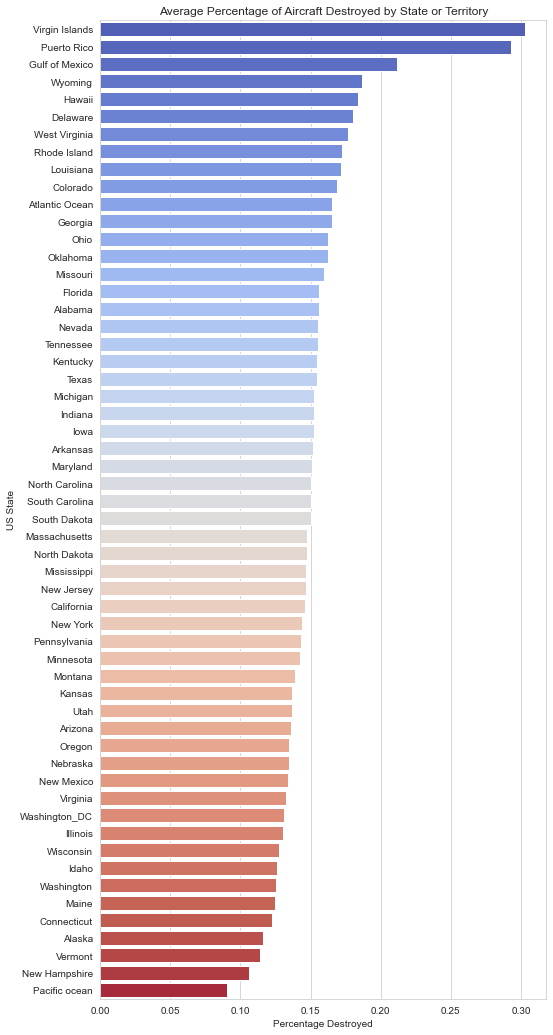

In [462]:
# Filter the DataFrame for 'Destroyed' damage and calculate the count per state
destroyed_df = us_accidents[us_accidents['Aircraft Damage'] == 'Destroyed']
state_destroyed_counts = destroyed_df['Us State'].value_counts()

# Calculate the total count of accidents per state
state_total_counts = us_accidents['Us State'].value_counts()

# Group by 'Us State' and calculate the average 'Percentage Destroyed' 
state_percentage_destroyed_sorted = us_accidents.groupby('Us State')['Percentage Destroyed'].mean().sort_values(ascending=False)

# Plot the sorted data in a horizontal bar chart
plt.figure(figsize=(8, 18))
sns.barplot(x=state_percentage_destroyed_sorted.values, y=state_percentage_destroyed_sorted.index, palette="coolwarm")
plt.title('Average Percentage of Aircraft Destroyed by State or Territory')
plt.xlabel('Percentage Destroyed')
plt.ylabel('US State')
plt.show();

Examining the plot, it appears that island territories such as Puerto Rico and the US Virgin Islands exhibit a significantly higher percentage of destruction from aircraft accidents or incidents. This trend may be influenced by a variety of factors, including but not limited to more challenging flying conditions such as unpredictable weather, limited emergency landing locations, and potentially less available resources for aircraft maintenance and repair. These factors can contribute to both the occurrence and the severity of accidents in these regions.

Now, I'll continue exploring our data by examining the Pearson correlation coefficient between `Overall Safety Rank` and `Percentage Destroyed` by utilizing the pandas built-in .corr() method.

In [463]:
correlation = final_data['Overall Safety Rank'].corr(final_data['Percentage Destroyed'])
correlation

0.6385366597350527

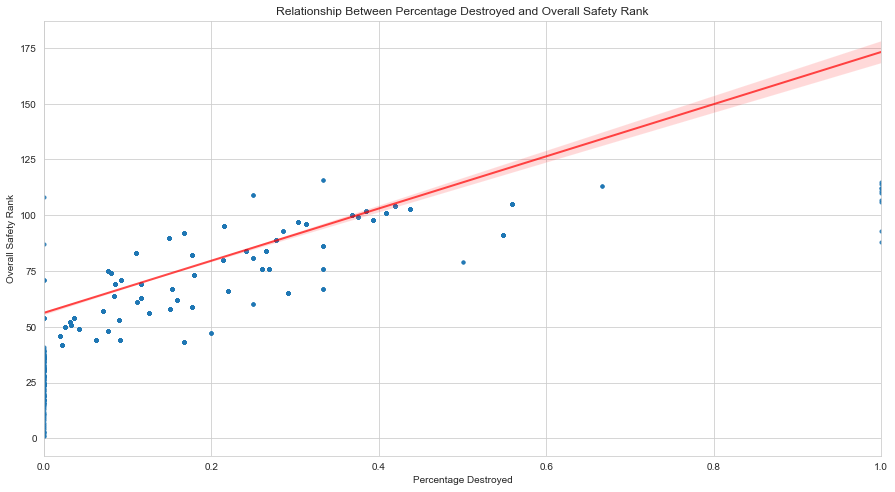

In [464]:
plot_data = final_data[['Overall Safety Rank', 'Percentage Destroyed']]

# Create a scatter plot
plt.figure(figsize=(15, 8))
sns.regplot(data=plot_data, x='Percentage Destroyed', y='Overall Safety Rank', scatter_kws={'s':10}, line_kws={'color':'r','alpha':0.7,'lw':2})
plt.title('Relationship Between Percentage Destroyed and Overall Safety Rank')
plt.xlabel('Percentage Destroyed')
plt.ylabel('Overall Safety Rank')
plt.show();

### Observation

This Pearson correlation coefficient of approximately 0.627 suggests there is a moderate to strong positive correlation between 'Percentage Destroyed' and 'Overall Safety Rank'. This means that as the percentage of aircraft reported as destroyed increases, the overall safety rank also tends to be higher, which in this context indicates a worse safety performance.

In other words, aircraft models that have a higher percentage of total losses in accidents are likely to have a worse (higher) safety rank in this analysis. This is consistent with what one might expect: more severe outcomes in accidents are indicative of greater safety concerns.

In [465]:
correlation = final_data['Overall Safety Rank'].corr(final_data['Normalized Accident Rate per Aircraft'])
correlation

0.6532935511975507

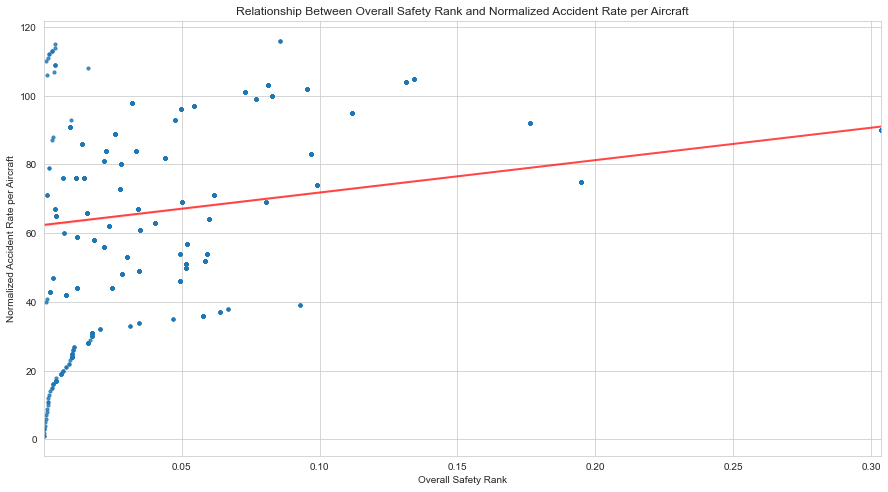

In [466]:
plot_data = final_data[['Overall Safety Rank', 'Normalized Accident Rate per Aircraft']]

# Drop any missing values to avoid errors during plotting
plot_data = plot_data.dropna()

# Create a scatter plot
plt.figure(figsize=(15, 8))
sns.regplot(data=plot_data, x='Normalized Accident Rate per Aircraft', y='Overall Safety Rank', scatter_kws={'s':10}, line_kws={'color':'r','alpha':0.7,'lw':2})
plt.title('Relationship Between Overall Safety Rank and Normalized Accident Rate per Aircraft')
plt.xlabel('Overall Safety Rank')
plt.ylabel('Normalized Accident Rate per Aircraft')
plt.show();

The correlation coefficient of approximately 0.659 indicates a moderate to strong positive relationship between the `Overall Safety Rank` and the `Normalized Accident Rate per Aircraft`. This means that as the `Overall Safety Rank` increases (which corresponds to a lower safety standing), so does the `Normalized Accident Rate per Aircraft`. In other words, aircraft that have a higher rank in terms of safety (where a higher rank means less safe) tend to also have a higher rate of accidents per aircraft.

This correlation suggests the `Overall Safety Rank`, which takes into account multiple factors such as fatality rates, serious injuries, destruction rates, and accident rates, is a good indicator of the relative safety of different aircraft. Higher accident rates are contributing to a worse safety ranking, as would be expected. This relationship can be useful for identifying which aircraft may need more stringent safety measures or which ones have safety concerns that need to be addressed.

With this foundation, I'll pivot our analysis to explore how these safety-related trends and patterns have evolved over time.

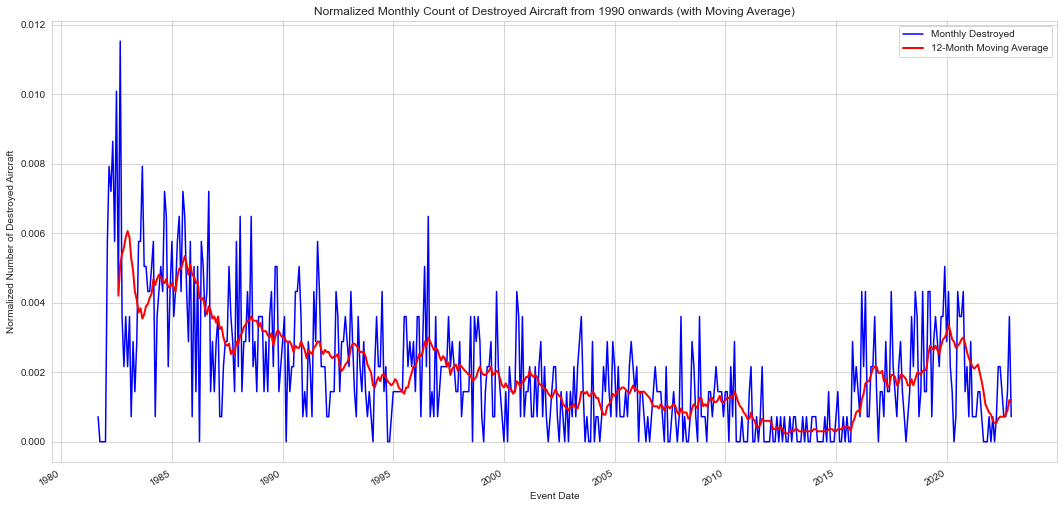

In [467]:
destroyed_data = final_data[final_data['Aircraft Damage'] == 'Destroyed']

# Resample by month and count the number of destroyed aircraft
monthly_destroyed = destroyed_data.resample('M').size()

# Filter the data for the year 1990 and onwards
#monthly_destroyed_1990_onwards = monthly_destroyed['1990':]

# Calculate the total number of destroyed aircraft over the filtered period
total_destroyed = monthly_destroyed.sum()

# Normalize the monthly count of destroyed aircraft by dividing by the total count for the filtered period
normalized_monthly_destroyed = monthly_destroyed / total_destroyed

plt.figure(figsize=(18, 9))
plt.plot(normalized_monthly_destroyed, linestyle='-', color='b', label='Monthly Destroyed')

# Calculate and plot a 12-month moving average on the normalized data
normalized_monthly_destroyed.rolling(window=12).mean().plot(color='red', linewidth=2, label='12-Month Moving Average')

plt.title('Normalized Monthly Count of Destroyed Aircraft from 1990 onwards (with Moving Average)')
plt.xlabel('Event Date')
plt.ylabel('Normalized Number of Destroyed Aircraft')
plt.legend()
plt.grid(True)

plt.show();

The overall trajectory for the destruction of aircraft was on the decline, indicating improvements in aviation safety.  However, there is a noticeable spike after 2015 through 2020 that warrants closer inspection. 

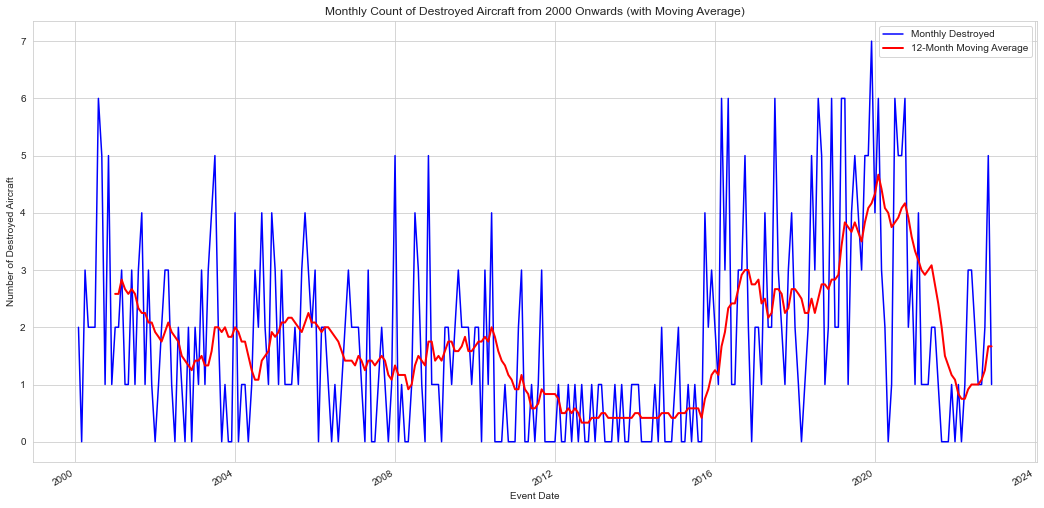

In [468]:
monthly_destroyed_2000_onwards = monthly_destroyed['2000':]

plt.figure(figsize=(18, 9)) 
plt.plot(monthly_destroyed_2000_onwards, linestyle='-', color='b', label='Monthly Destroyed')

monthly_destroyed_2000_onwards.rolling(window=12).mean().plot(color='red', linewidth=2, label='12-Month Moving Average')

plt.title('Monthly Count of Destroyed Aircraft from 2000 Onwards (with Moving Average)')
plt.xlabel('Event Date')
plt.ylabel('Number of Destroyed Aircraft')
plt.legend()
plt.grid(True)
plt.show();

The line plot with a 12-month moving average that shows high spikes in the early to late '90s followed by a gradual decrease and then a plateau between 2012 and 2016 suggests several potential trends and factors at play over time:

**Gradual Decrease After the '90s**:
The decrease following the spike in the '90s might indicate:

1. Improvements in aviation technology, leading to safer aircraft.
2. Tighter regulations and better enforcement of safety measures.
3. The retirement of older, less safe aircraft and the introduction of newer models with advanced safety features.
4. Improved pilot training and better maintenance practices.
**Plateau Between 2012 and 2016**:
The leveling off of destroyed aircraft incidents could reflect a period of stability in the aviation industry, where:

1. Existing safety measures and technologies had matured and were effectively reducing accidents.
2. There was a balance between the growth of air traffic and the safety protocols in place.
**Spike Around 2016**:
Another spike suggests that there could have been:

1. External factors such as economic or political events that led to increased flying under riskier circumstances.
2. A possible lapse in safety standards or enforcement.
3. Introduction of new technologies that, while intended to improve safety, may initially have had the opposite effect as users adapted to them.
**Decrease After 2016**:
The subsequent decrease could be due to:

1. Quick corrective actions taken by the aviation industry and regulators in response to the spike in incidents.
2. Adaptation and better integration of new technologies.
3. Continuous improvements in global safety standards.
**Beginning to Increase Again in 2024**:
If there's an indication of an upward trend in 2024, it could mean:

1. New challenges are emerging in the aviation industry, possibly related to increased traffic post-pandemic or new types of aircraft being introduced.
2. It might also reflect a lag in updating and enforcing regulations to keep pace with new developments in aviation technology.

### Recommendations:

Drawing from the analyzed data, the following strategic actions are suggested:

**Aircraft Selection**
- For optimal aircraft safety, it is crucial to consider aircraft with lower accident rates and those that predominantly sustain minor damage when incidents occur. Aircraft equipped with Turbo Fan engines have demonstrated a correlation with enhanced safety outcomes and are therefore recommended as the preferred engine type for reliability and safety.

**What to Avoid**
- Exercise caution with instructional flights, as data indicates these have a higher propensity for accidents.
- Prioritize flights within North America. International journeys, particularly over international waters, exhibit a higher severity in accidents and incidents, making them comparatively riskier.

**Areas of Improvement**
- Prioritize advanced pilot training focused on over-water navigation and emergency procedures, given the increased destruction rates observed in territories such as the Virgin Islands and Puerto Rico. Additionally, evaluate and improve refueling strategies and aviation infrastructure to bolster safety for long-haul flights over extensive water bodies.

In [469]:
final_data.to_csv('AviationData_Clean.csv')